### **Defining Work Directory wih Google Colab**
Define the working directory as the `data` folder of the shared folder `DS4A-Team12` in Google Drive

In [ ]:
import os
from google.colab import drive 
# Enlazar a la carpeta data de la carpeta compartida en Drive
drive.mount('/content/drive')
working_dir = '/content/drive/MyDrive/DS4A-Team12/data'
os.chdir(working_dir)
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1dkrMUgtvHu8Va_rPx6L6g6q-151MIsTK/DS4A-Team12/data


In [ ]:
# Librerias relevantes 
import pandas as pd
import numpy as np
# Opciones de visualización
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 100

### **Open the Sociodemografic Database of SISBEN**
Opens the file `Sociodemo_pre.parquet` (5945349 registers, 148 MB) as a dataframe with the name `soc` with all the database, preprocessed to assign to every variable the corresponding data type.

Also opens the dictionary of the file `sociodemo_datatypes_low_memo.json` that allows to assign data types to the variables for a more efficient use of the memory (641 MB). 

In [ ]:
import json
# Abre el diccionario con la estructura de datos definida
soc_datatypes_file = open('datatypes_dictionaries/sociodemo_datatypes_low_memo.json', 'r')
soc_datatypes = json.load(soc_datatypes_file)
# Abre el dataframe
soc = pd.read_parquet('preprocessed_data/Sociodemo_pre.parquet')
soc = soc.astype(soc_datatypes)

In [ ]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945349 entries, 0 to 5945348
Data columns (total 68 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Cod_clase                 category      
 1   Ind_grupo_sisben_4        category      
 2   Ind_nivel_sisben_4        UInt8         
 3   Tip_vivienda              category      
 4   Ind_tiene_energia         category      
 5   Ind_tiene_alcantarillado  category      
 6   Ind_tiene_gas             category      
 7   Ind_tiene_recoleccion     category      
 8   Ind_tiene_acueducto       category      
 9   Num_hogares_vivienda      UInt8         
 10  Tip_ocupa_vivienda        category      
 11  Ind_tiene_cocina          category      
 12  Ind_tiene_nevera          category      
 13  Ind_tiene_lavadora        category      
 14  Ind_tiene_pc              category      
 15  Ind_tiene_internet        category      
 16  Num_personas_hogar        category      
 17  Sexo    

### **Opening the Nutritional Takes Database of the ICBF (First Childhood Dependency)**

Opens the file `TomasDPI_pre.parquet` (6006668 registers, 482.2 MB) as a dataframe of name `tom`, with first 98 columns of all the registers of the nutritional takes database taken by the First Choldhood Dependency (takes one to four), preprocessed to assign to every variable the corresponding data type. 

Also opens the dictionary of the file `tomas_datatypes_low_memo.json` that allows to assign to the variables data types for a more efficient use of memory (1.8 GB).

In [ ]:
import json
# Opens the dictionary with the defined structure. 
tom_datatypes_file = open('datatypes_dictionaries/tomas_datatypes_low_memo.json', 'r')
tom_datatypes = json.load(tom_datatypes_file)
# Opens the Dataframe
tom = pd.read_parquet('preprocessed_data/TomasDPI_pre.parquet')
# Assign to every variable it's data type 
# Contains data types incompatibles with parquet
for col in tom.columns:
  tom[col] = tom[col].astype(tom_datatypes[col])

In [ ]:
# Optional: Preserves only an aleatory sample of n = 1 million registers 
# Use a random state to guarantee the same results 
tom_sample = tom.sample(n = 1000000, random_state = 2021)

In [ ]:
tom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006668 entries, 0 to 6007560
Data columns (total 98 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   Vigencia                          category      
 1   IdBeneficiario                    UInt32        
 2   Id                                UInt32        
 3   TipoBeneficiario                  category      
 4   FechaNacimiento                   datetime64[ns]
 5   Sexo                              category      
 6   CodigoPaisNacimientoBeneficiario  UInt32        
 7   PaisNacimientoBeneficiario        category      
 8   PresentaDiscapacidad              category      
 9   ZonaUbicacionBeneficiario         category      
 10  GrupoEtnico                       category      
 11  MesesLactanciaMaternaExclusiva    UInt8         
 12  MesesLactanciaMaternaTotal        UInt8         
 13  PesoBeneficiarioAlNacer           float32       
 14  TallaBeneficiarioA

In [ ]:
tom.head()

Vigencia  IdBeneficiario       Id TipoBeneficiario FechaNacimiento Sexo  \
0     2017        12230154  2267350              NaN      2013-05-21    M   
1     2017        12230155     <NA>              NaN      2012-12-28    M   
2     2017        12230170  4837594              NaN      2015-05-14    M   
3     2017        12230174     <NA>              NaN      2015-02-07    F   
4     2017        12230192  3298454              NaN      2013-06-19    M   

   CodigoPaisNacimientoBeneficiario PaisNacimientoBeneficiario  \
0                               169                   Colombia   
1                               169                   Colombia   
2                               169                   Colombia   
3                               169                   Colombia   
4                               169                   Colombia   

  PresentaDiscapacidad ZonaUbicacionBeneficiario  \
0                   NO                  CABECERA   
1                   NO                  CABECERA   
2                   NO                     RESTO   
3                   NO                     RESTO   
4                   NO                     RESTO   

                                       GrupoEtnico  \
0  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
1  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
2  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
3  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
4  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   

   MesesLactanciaMaternaExclusiva  MesesLactanciaMaternaTotal  \
0                               6                           6   
1                               6                           6   
2                               6                           0   
3                               7                           6   
4                               6                          18   

   PesoBeneficiarioAlNacer  TallaBeneficiarioAlNacer AntecendentePremadurez  \
0                      NaN                       NaN                    NaN   
1                      NaN                       NaN                          
2                      NaN                       NaN                    NaN   
3                      NaN                       NaN                    NaN   
4                      NaN                       NaN                    NaN   

   EdadGestacionalAlNacer                             RegimenSeguridadSocial  \
0                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    
1                       0  BENEFICIARIO O COTIZANTE DEL  REGIMEN CONTRIBU...   
2                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    
3                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    
4                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    

     Toma1                                         ServicioT1  \
0  20171.0                   HCB TRADICIONAL- COMUNITARIO (T)   
1  20171.0         CDI SIN ARRIENDO -  INSTITUCIONAL INTEGRAL   
2  20171.0  DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI...   
3  20171.0  DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI...   
4  20171.0          HCB  AGRUPADOS -INSTITUCIONAL TRADICIONAL   

  FechaValoracionNutricionalT1  EdadMesesT1 FechaMedicionPerimetroBraquialT1  \
0                   2017-02-27         45.0                              NaT   
1                   2017-02-02         49.0                              NaT   
2                   2017-02-25         21.0                              NaT   
3                   2017-02-14         24.0                              NaT   
4                   2017-02-08         43.0                              NaT   

   MedicionPerimetroBraquialT1  PesoT1  TallaT1  ZScoreTallaEdadT1  \
0                          NaN    20.1    101.0              -0.19   
1                          NaN    17.0    102.5              -0.35   
2                          NaN    11.0     78.0              -2.60   
3    

In [ ]:
import plotly 
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Weight for the height Zscore  vs other numerical variables

In [ ]:
# finding some quantiles to remove extreme values
tom_sample['ZScorePesoTallaT1'].quantile(0.99)

3.37

In [ ]:
tom_sample['ZScorePesoTallaT1'].quantile(0.01)

-2.4

In [ ]:
tom_filter_zscore = tom_sample[(tom_sample['ZScorePesoTallaT1']<=3.37) & (tom_sample['ZScorePesoTallaT1']>=-2.4)]

# EDA for the distribution of some features

# Scatterplots

In [ ]:
cols_to_scatter = ['PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer',
                   'MedicionPerimetroBraquialT1', 'PesoT1', 'TallaT1', 'ZScorePesoTallaT1']

In [ ]:
tom_sample_to_scatter = tom_filter_zscore[cols_to_scatter]

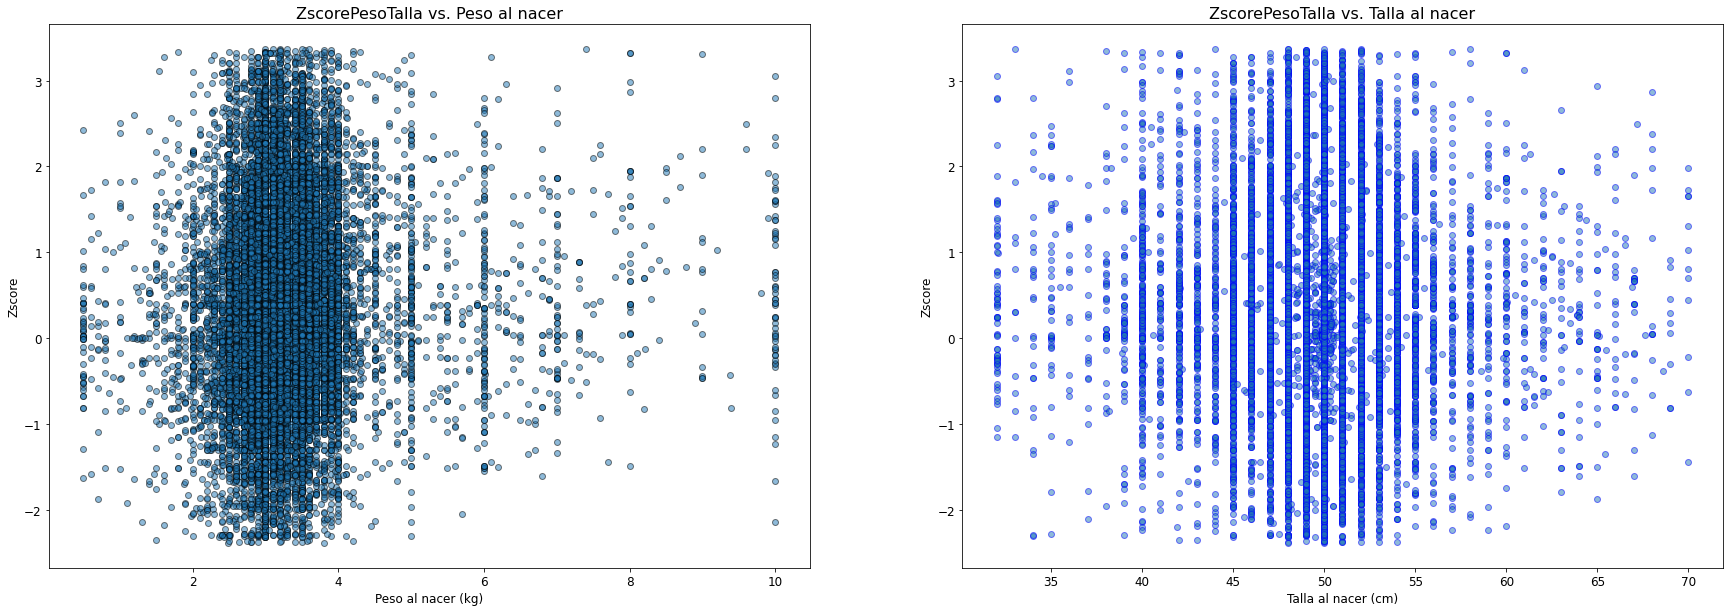

In [ ]:
# Zscore vs Peso al nacer
plt.figure(figsize=(30,10))

plt.subplot(121)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoTallaT1'], x=tom_sample_to_scatter['PesoBeneficiarioAlNacer'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Peso al nacer (kg)', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('ZscorePesoTalla vs. Peso al nacer', fontsize=16)

# Zscore vs Talla al nacer
plt.subplot(122)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoTallaT1'], x=tom_sample_to_scatter['TallaBeneficiarioAlNacer'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla al nacer (cm)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('ZscorePesoTalla vs. Talla al nacer', fontsize=16)

plt.show()

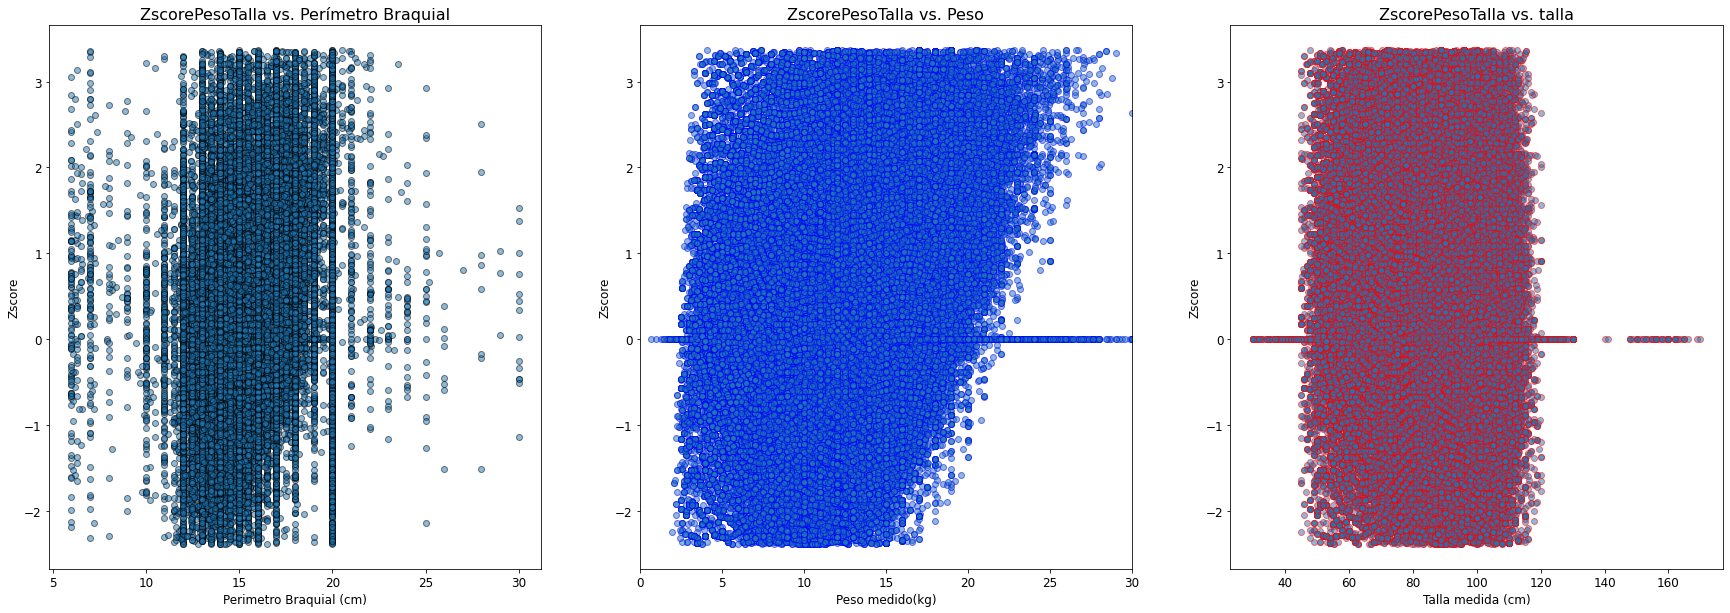

In [ ]:
# Zscore vs Perimetro Braquial
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.scatter(y=tom_sample_to_scatter['ZScorePesoTallaT1'], x=tom_sample_to_scatter['MedicionPerimetroBraquialT1'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Perimetro Braquial (cm)', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('ZscorePesoTalla vs. Perímetro Braquial', fontsize=16)

# Zscore vs Medición de peso
plt.subplot(132)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoTallaT1'], x=tom_sample_to_scatter['PesoT1'], edgecolor='b', alpha=0.5)

plt.xlim(0, 30)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Peso medido(kg)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('ZscorePesoTalla vs. Peso', fontsize=16)

# Zscore vs Talla medida
plt.subplot(133)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoTallaT1'], x=tom_sample_to_scatter['TallaT1'], edgecolor='r', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla medida (cm)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('ZscorePesoTalla vs. talla', fontsize=16)

plt.show()



# Height for the Age Zscore vs other variables



In [ ]:
tom_sample['ZScoreTallaEdadT1'].quantile(0.99)

2.73

In [ ]:
tom_sample['ZScoreTallaEdadT1'].quantile(0.01)

-4.44

In [ ]:
tom_filter_zscore = tom_sample[(tom_sample['ZScoreTallaEdadT1']<=2.73) & (tom_sample['ZScorePesoTallaT1']>=-4.44)]
cols_to_scatter = ['PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer',
                    'MedicionPerimetroBraquialT1', 'PesoT1', 'TallaT1', 'ZScoreTallaEdadT1']
tom_sample_to_scatter = tom_filter_zscore[cols_to_scatter]

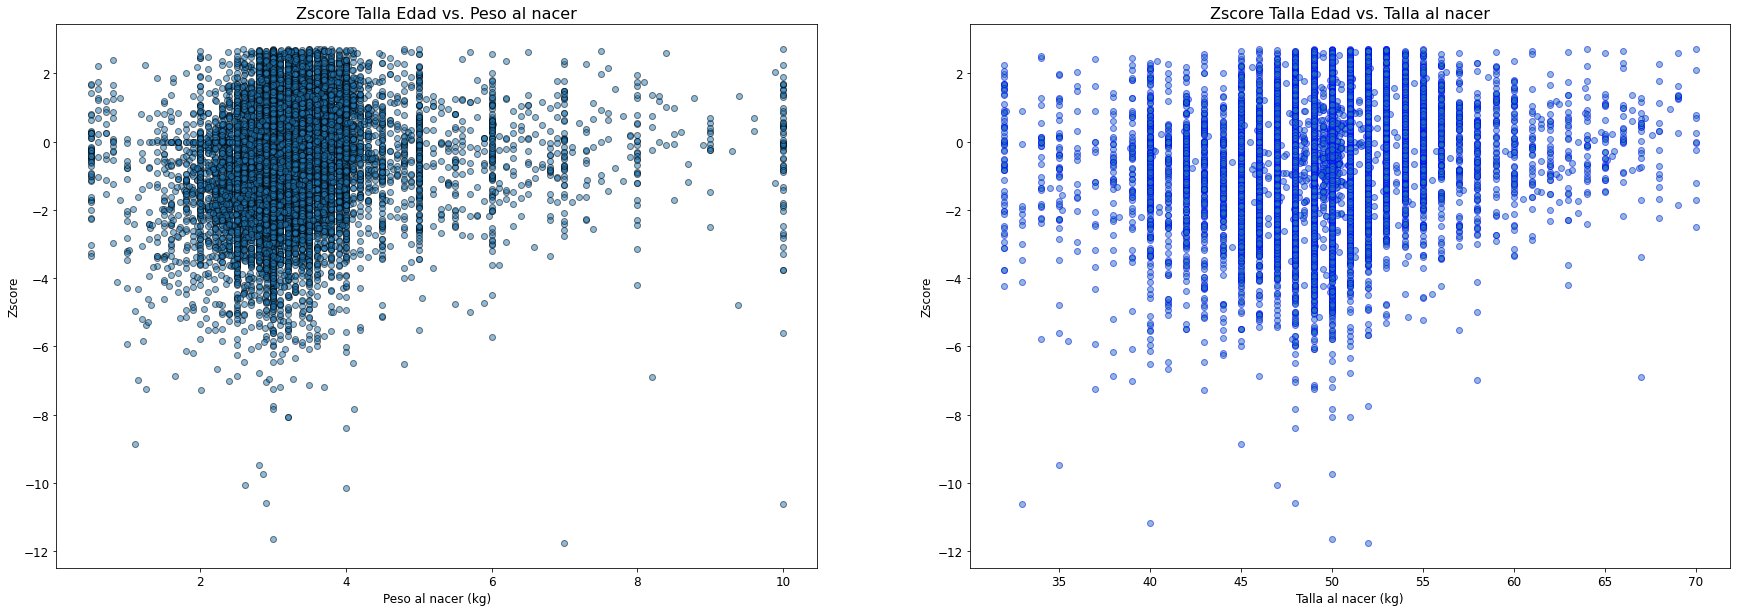

In [ ]:
# Zscore vs Peso al nacer
plt.figure(figsize=(30,10))

plt.subplot(121)

plt.scatter(y=tom_sample_to_scatter['ZScoreTallaEdadT1'], x=tom_sample_to_scatter['PesoBeneficiarioAlNacer'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Peso al nacer (kg)', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('Zscore Talla Edad vs. Peso al nacer', fontsize=16)

# Zscore vs Talla al nacer
plt.subplot(122)

plt.scatter(y=tom_sample_to_scatter['ZScoreTallaEdadT1'], x=tom_sample_to_scatter['TallaBeneficiarioAlNacer'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla al nacer (kg)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Zscore Talla Edad vs. Talla al nacer', fontsize=16)

plt.show()

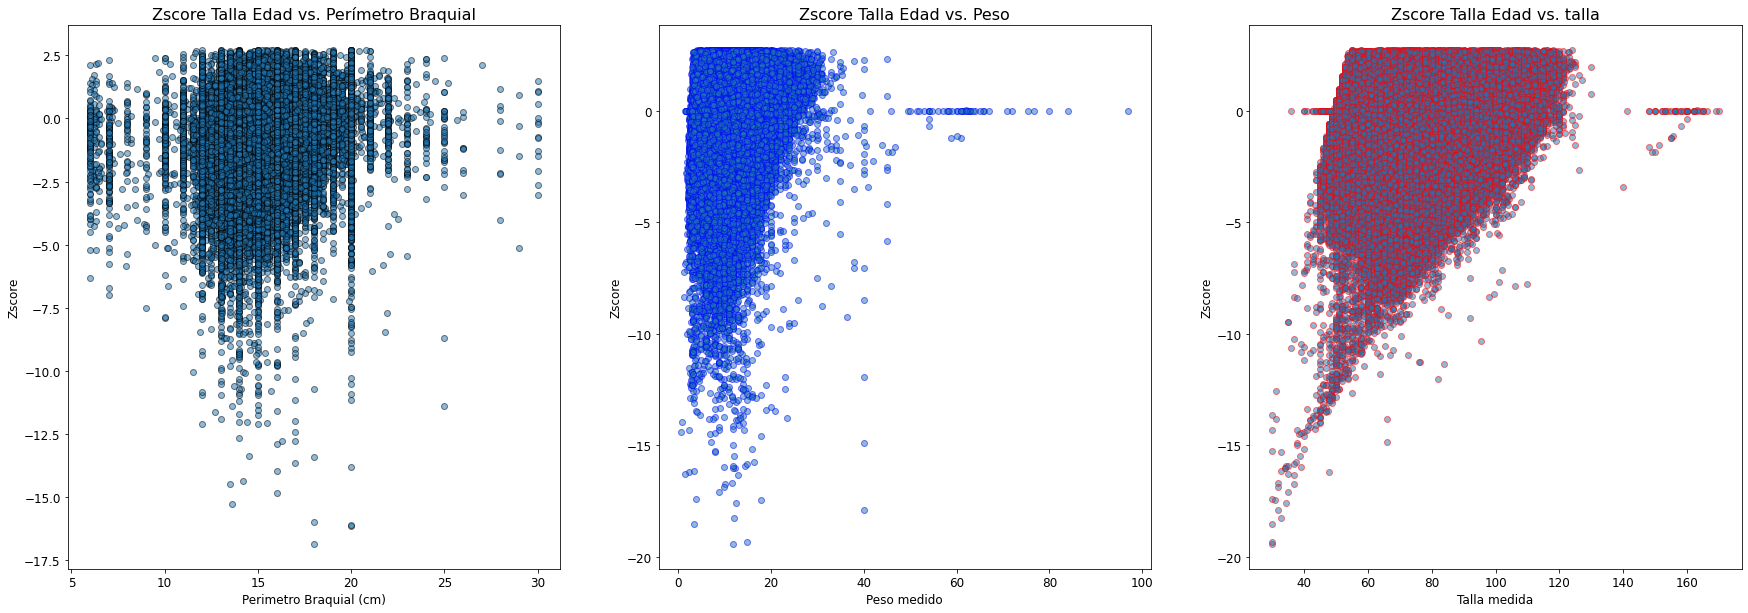

In [ ]:
# Zscore vs Perimetro Braquial
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.scatter(y=tom_sample_to_scatter['ZScoreTallaEdadT1'], x=tom_sample_to_scatter['MedicionPerimetroBraquialT1'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Perimetro Braquial (cm)', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('Zscore Talla Edad vs. Perímetro Braquial', fontsize=16)

# Zscore vs Medición de peso
plt.subplot(132)

plt.scatter(y=tom_sample_to_scatter['ZScoreTallaEdadT1'], x=tom_sample_to_scatter['PesoT1'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Peso medido', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Zscore Talla Edad vs. Peso', fontsize=16)

# Zscore vs Talla medida
plt.subplot(133)

plt.scatter(y=tom_sample_to_scatter['ZScoreTallaEdadT1'], x=tom_sample_to_scatter['TallaT1'], edgecolor='r', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla medida', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Zscore Talla Edad vs. talla', fontsize=16)

plt.show()

# Weight for the age Zscore  vs other variables

In [ ]:
tom_sample['ZScorePesoEdadT1'].quantile(0.99)

2.43

In [ ]:
tom_sample['ZScorePesoEdadT1'].quantile(0.01)

-2.8

In [ ]:
tom_filter_zscore = tom_sample[(tom_sample['ZScorePesoEdadT1']<=2.43) & (tom_sample['ZScorePesoTallaT1']>=-2.8)]
cols_to_scatter = ['PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer',
                   'MedicionPerimetroBraquialT1', 'PesoT1', 'TallaT1', 'ZScorePesoEdadT1']
tom_sample_to_scatter = tom_filter_zscore[cols_to_scatter]


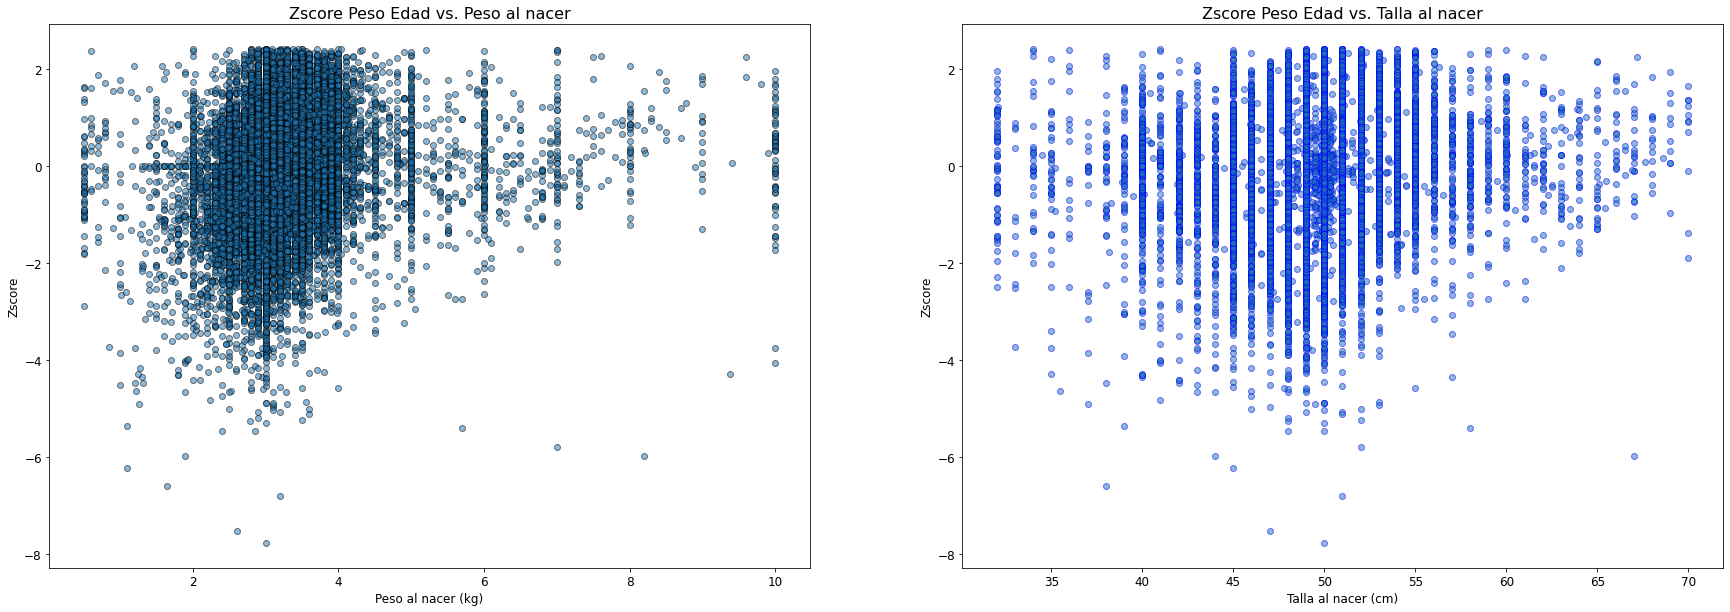

In [ ]:
# Zscore vs Peso al nacer
plt.figure(figsize=(30,10))

plt.subplot(121)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoEdadT1'], x=tom_sample_to_scatter['PesoBeneficiarioAlNacer'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Peso al nacer (kg)', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('Zscore Peso Edad vs. Peso al nacer', fontsize=16)

# Zscore vs Talla al nacer
plt.subplot(122)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoEdadT1'], x=tom_sample_to_scatter['TallaBeneficiarioAlNacer'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla al nacer (cm)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Zscore Peso Edad vs. Talla al nacer', fontsize=16)

plt.show()

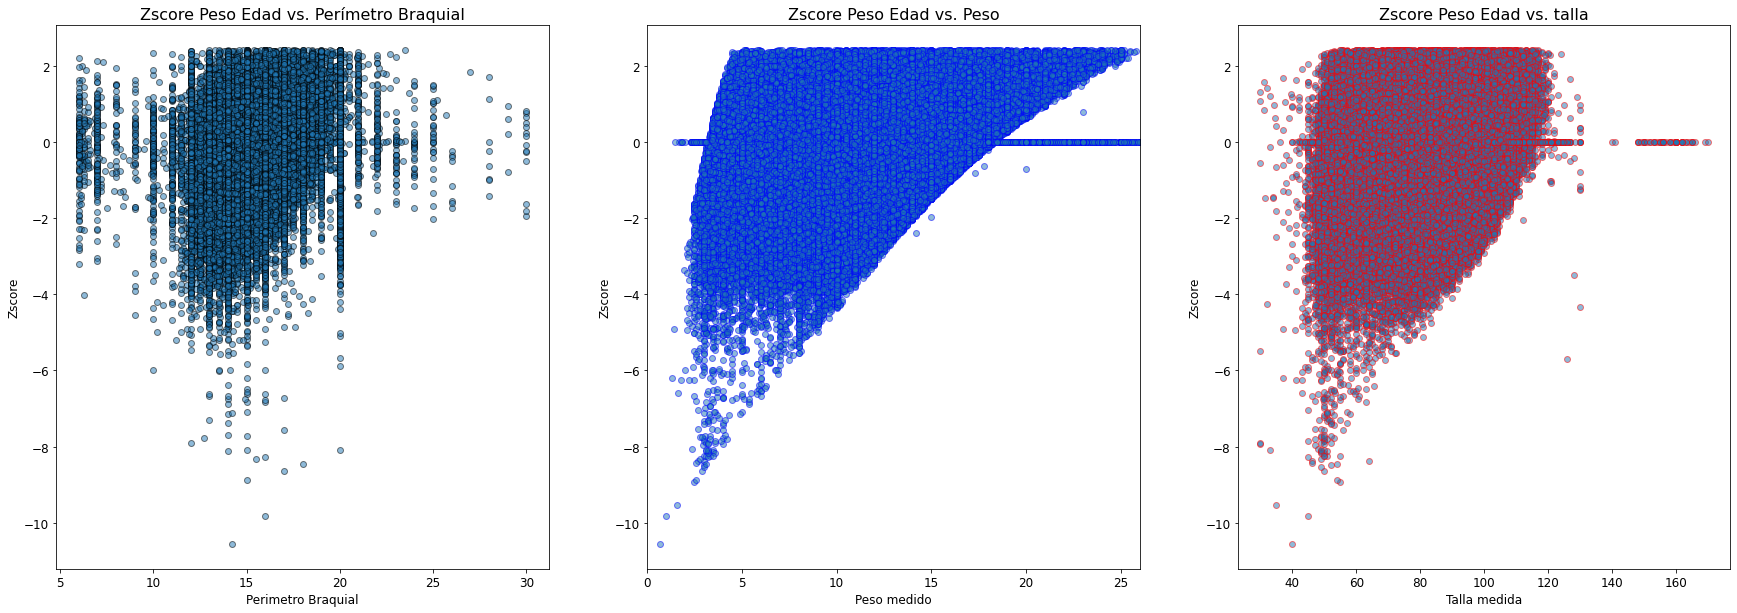

In [ ]:
# Zscore vs Perimetro Braquial
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.scatter(y=tom_sample_to_scatter['ZScorePesoEdadT1'], x=tom_sample_to_scatter['MedicionPerimetroBraquialT1'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Perimetro Braquial', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('Zscore Peso Edad vs. Perímetro Braquial', fontsize=16)

# Zscore vs Medición de peso
plt.subplot(132)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoEdadT1'], x=tom_sample_to_scatter['PesoT1'], edgecolor='b', alpha=0.5)

plt.xlim(0, 26)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Peso medido', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Zscore Peso Edad vs. Peso', fontsize=16)

# Zscore vs Talla medida
plt.subplot(133)

plt.scatter(y=tom_sample_to_scatter['ZScorePesoEdadT1'], x=tom_sample_to_scatter['TallaT1'], edgecolor='r', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla medida', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Zscore Peso Edad vs. talla', fontsize=16)

plt.show()

# ZScoreIMCT vs other variables

In [ ]:
tom_sample['ZScoreIMCT1'].quantile(0.99)

3.61

In [ ]:
tom_sample['ZScoreIMCT1'].quantile(0.01)

-2.47

In [ ]:
tom_filter_zscore = tom_sample[(tom_sample['ZScoreIMCT1']<=3.61) & (tom_sample['ZScoreIMCT1']>=-2.47)]
cols_to_scatter = ['PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer',
                   'MedicionPerimetroBraquialT1', 'PesoT1', 'TallaT1', 'ZScoreIMCT1']
tom_sample_to_scatter = tom_filter_zscore[cols_to_scatter]
# for col in cols_to_scatter:
#   fig = px.scatter(data_frame=tom_sample_to_scatter, x = 'ZScoreIMCT1', y = col)
#   fig.show()

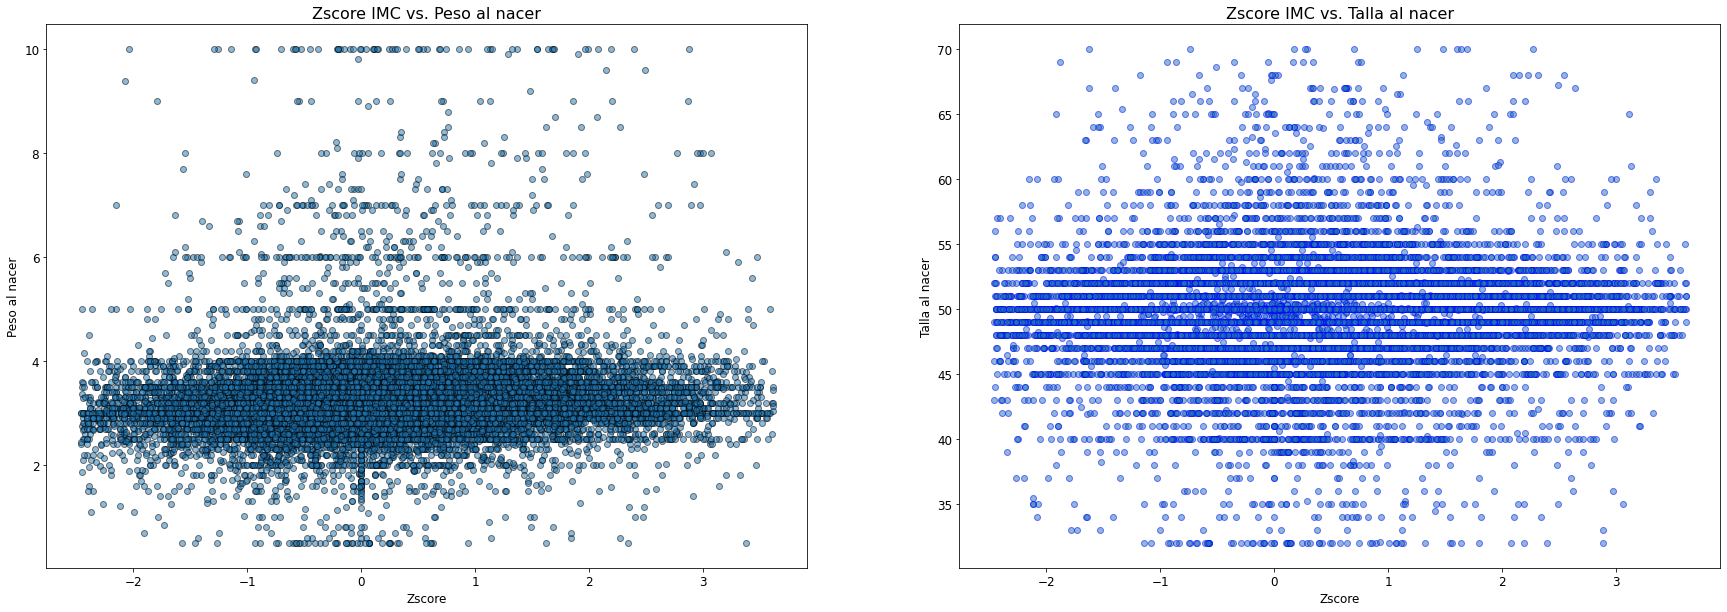

In [ ]:
# Zscore vs Peso al nacer
plt.figure(figsize=(30,10))

plt.subplot(121)

plt.scatter(x=tom_sample_to_scatter['ZScoreIMCT1'], y=tom_sample_to_scatter['PesoBeneficiarioAlNacer'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.yticks(fontsize=12)
plt.ylabel('Peso al nacer', fontsize=12)

plt.xticks(fontsize=12)
# plt.xlim(0, 120000)
plt.xlabel('Zscore', fontsize=12)

plt.title('Zscore IMC vs. Peso al nacer', fontsize=16)

# Zscore vs Talla al nacer
plt.subplot(122)

plt.scatter(x=tom_sample_to_scatter['ZScoreIMCT1'], y=tom_sample_to_scatter['TallaBeneficiarioAlNacer'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.xlabel('Zscore', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 120000)
plt.ylabel('Talla al nacer', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Zscore IMC vs. Talla al nacer', fontsize=16)

plt.show()

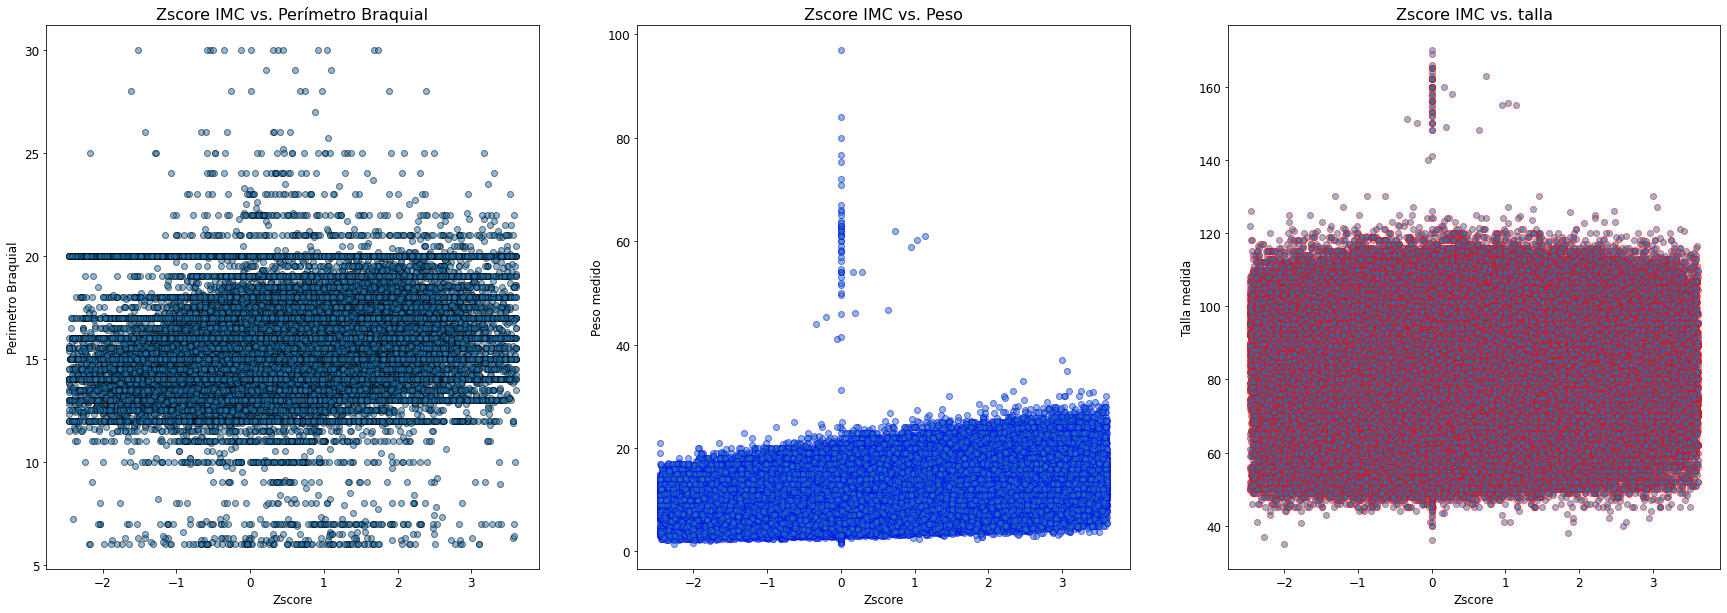

In [ ]:
# Zscore vs Perimetro Braquial
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.scatter(x=tom_sample_to_scatter['ZScoreIMCT1'], y=tom_sample_to_scatter['MedicionPerimetroBraquialT1'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.yticks(fontsize=12)
plt.ylabel('Perimetro Braquial', fontsize=12)

plt.xticks(fontsize=12)
# plt.xlim(0, 120000)
plt.xlabel('Zscore', fontsize=12)

plt.title('Zscore IMC vs. Perímetro Braquial', fontsize=16)

# Zscore vs Medición de peso
plt.subplot(132)

plt.scatter(x=tom_sample_to_scatter['ZScoreIMCT1'], y=tom_sample_to_scatter['PesoT1'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.xlabel('Zscore', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 120000)
plt.ylabel('Peso medido', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Zscore IMC vs. Peso', fontsize=16)

# Zscore vs Talla medida
plt.subplot(133)

plt.scatter(x=tom_sample_to_scatter['ZScoreIMCT1'], y=tom_sample_to_scatter['TallaT1'], edgecolor='r', alpha=0.5)

#plt.xlim(0, 100)
plt.xlabel('Zscore', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 120000)
plt.ylabel('Talla medida', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Zscore IMC vs. talla', fontsize=16)

plt.show()

#  Zscore Variation in function of categorical variables, for risk of malnutrition population (Zscores < 1 )



In [ ]:
import seaborn as sns

In [ ]:
tom_filter_zscore = tom_sample[(tom_sample['ZScorePesoTallaT1']<=3.37) & (tom_sample['ZScorePesoTallaT1']>=-2.4)]

In [ ]:
tom_filter_zscore

Vigencia  IdBeneficiario       Id TipoBeneficiario FechaNacimiento  \
3286546     2018        16270654  2891450              NaN      2015-06-12   
1095545     2017        12678852     <NA>              NaN      2015-10-12   
1954094     2017        14691027  4352628              NaN      2016-12-20   
4659684     2019        12786202     <NA>              NaN      2014-07-22   
1315480     2017         8739406  5718702              NaN      2013-04-10   
...          ...             ...      ...              ...             ...   
6005256     2019        17086915  4056186              NaN      2017-11-17   
1295816     2017         4714131  5765031              NaN      2012-09-03   
1039495     2017         9565860     <NA>              NaN      2014-03-07   
3178930     2018        14839397     <NA>              NaN      2016-08-11   
1398160     2017         8194316     <NA>              NaN      2013-04-12   

        Sexo  CodigoPaisNacimientoBeneficiario PaisNacimientoBeneficiario  \
3286546    M                               169                   Colombia   
1095545    M                               169                   Colombia   
1954094    M                               169                   Colombia   
4659684    F                               170                   Colombia   
1315480    M                               169                   Colombia   
...      ...                               ...                        ...   
6005256    F                               170                   Colombia   
1295816    M                               169                   Colombia   
1039495    F                               169                   Colombia   
3178930    M                               169                   Colombia   
1398160    M                               169                   Colombia   

        PresentaDiscapacidad ZonaUbicacionBeneficiario  \
3286546                   NO                     RESTO   
1095545                   NO                     RESTO   
1954094                   NO                  CABECERA   
4659684                   NO                  CABECERA   
1315480                   NO                     RESTO   
...                      ...                       ...   
6005256                   NO                  CABECERA   
1295816                   NO                     RESTO   
1039495                   NO                  CABECERA   
3178930                   NO                     RESTO   
1398160                   NO                  CABECERA   

                                             GrupoEtnico  \
3286546  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
1095545                                   AFROCOLOMBIANO   
1954094  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
4659684                                              NaN   
1315480  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
...                                                  ...   
6005256  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
1295816  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
1039495                                   AFROCOLOMBIANO   
3178930  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
1398160  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   

         MesesLactanciaMaternaExclusiva  MesesLactanciaMaternaTotal  \
3286546                               6                          24   
1095545                               6                          12   
1954094                               6                           0   
4659684                               6                           6   
1315480                               6                          16   
...                                 ...                         ...   
6005256                               6                          12   
1295816                               3                           0   
1039495                               6                          12   
3178930           

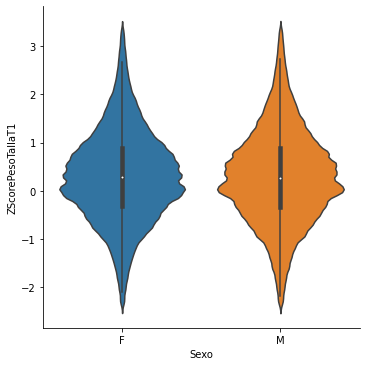

In [ ]:
sns.catplot(x="Sexo", y="ZScorePesoTallaT1",
            kind="violin", split=True, data=tom_filter_zscore)

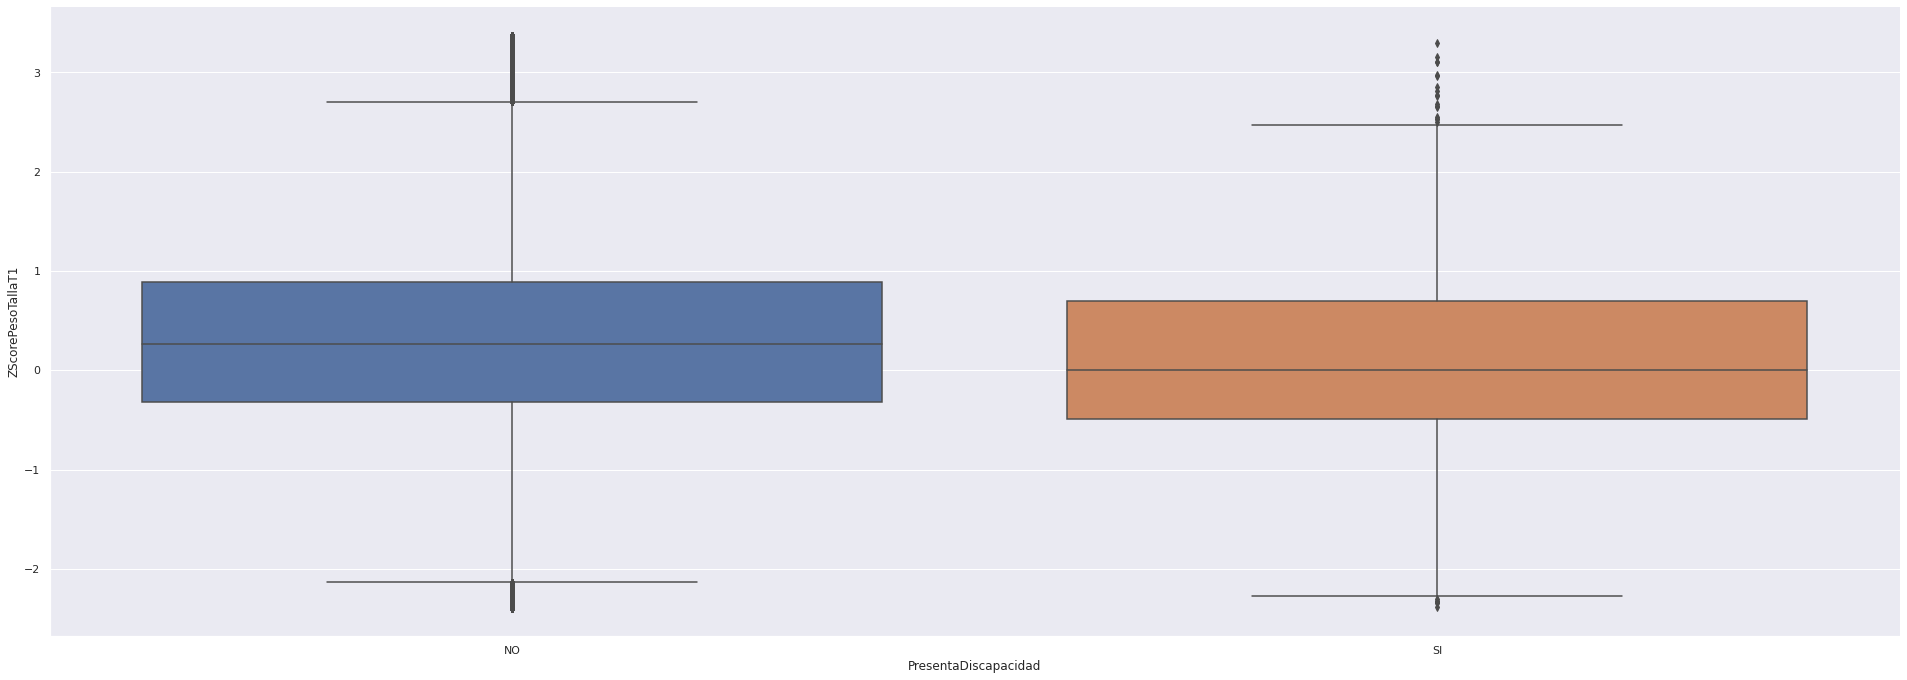

In [ ]:

g=sns.catplot(x="PresentaDiscapacidad", y="ZScorePesoTallaT1",
            kind="box", data=tom_filter_zscore)
g.fig.set_size_inches(30,10)

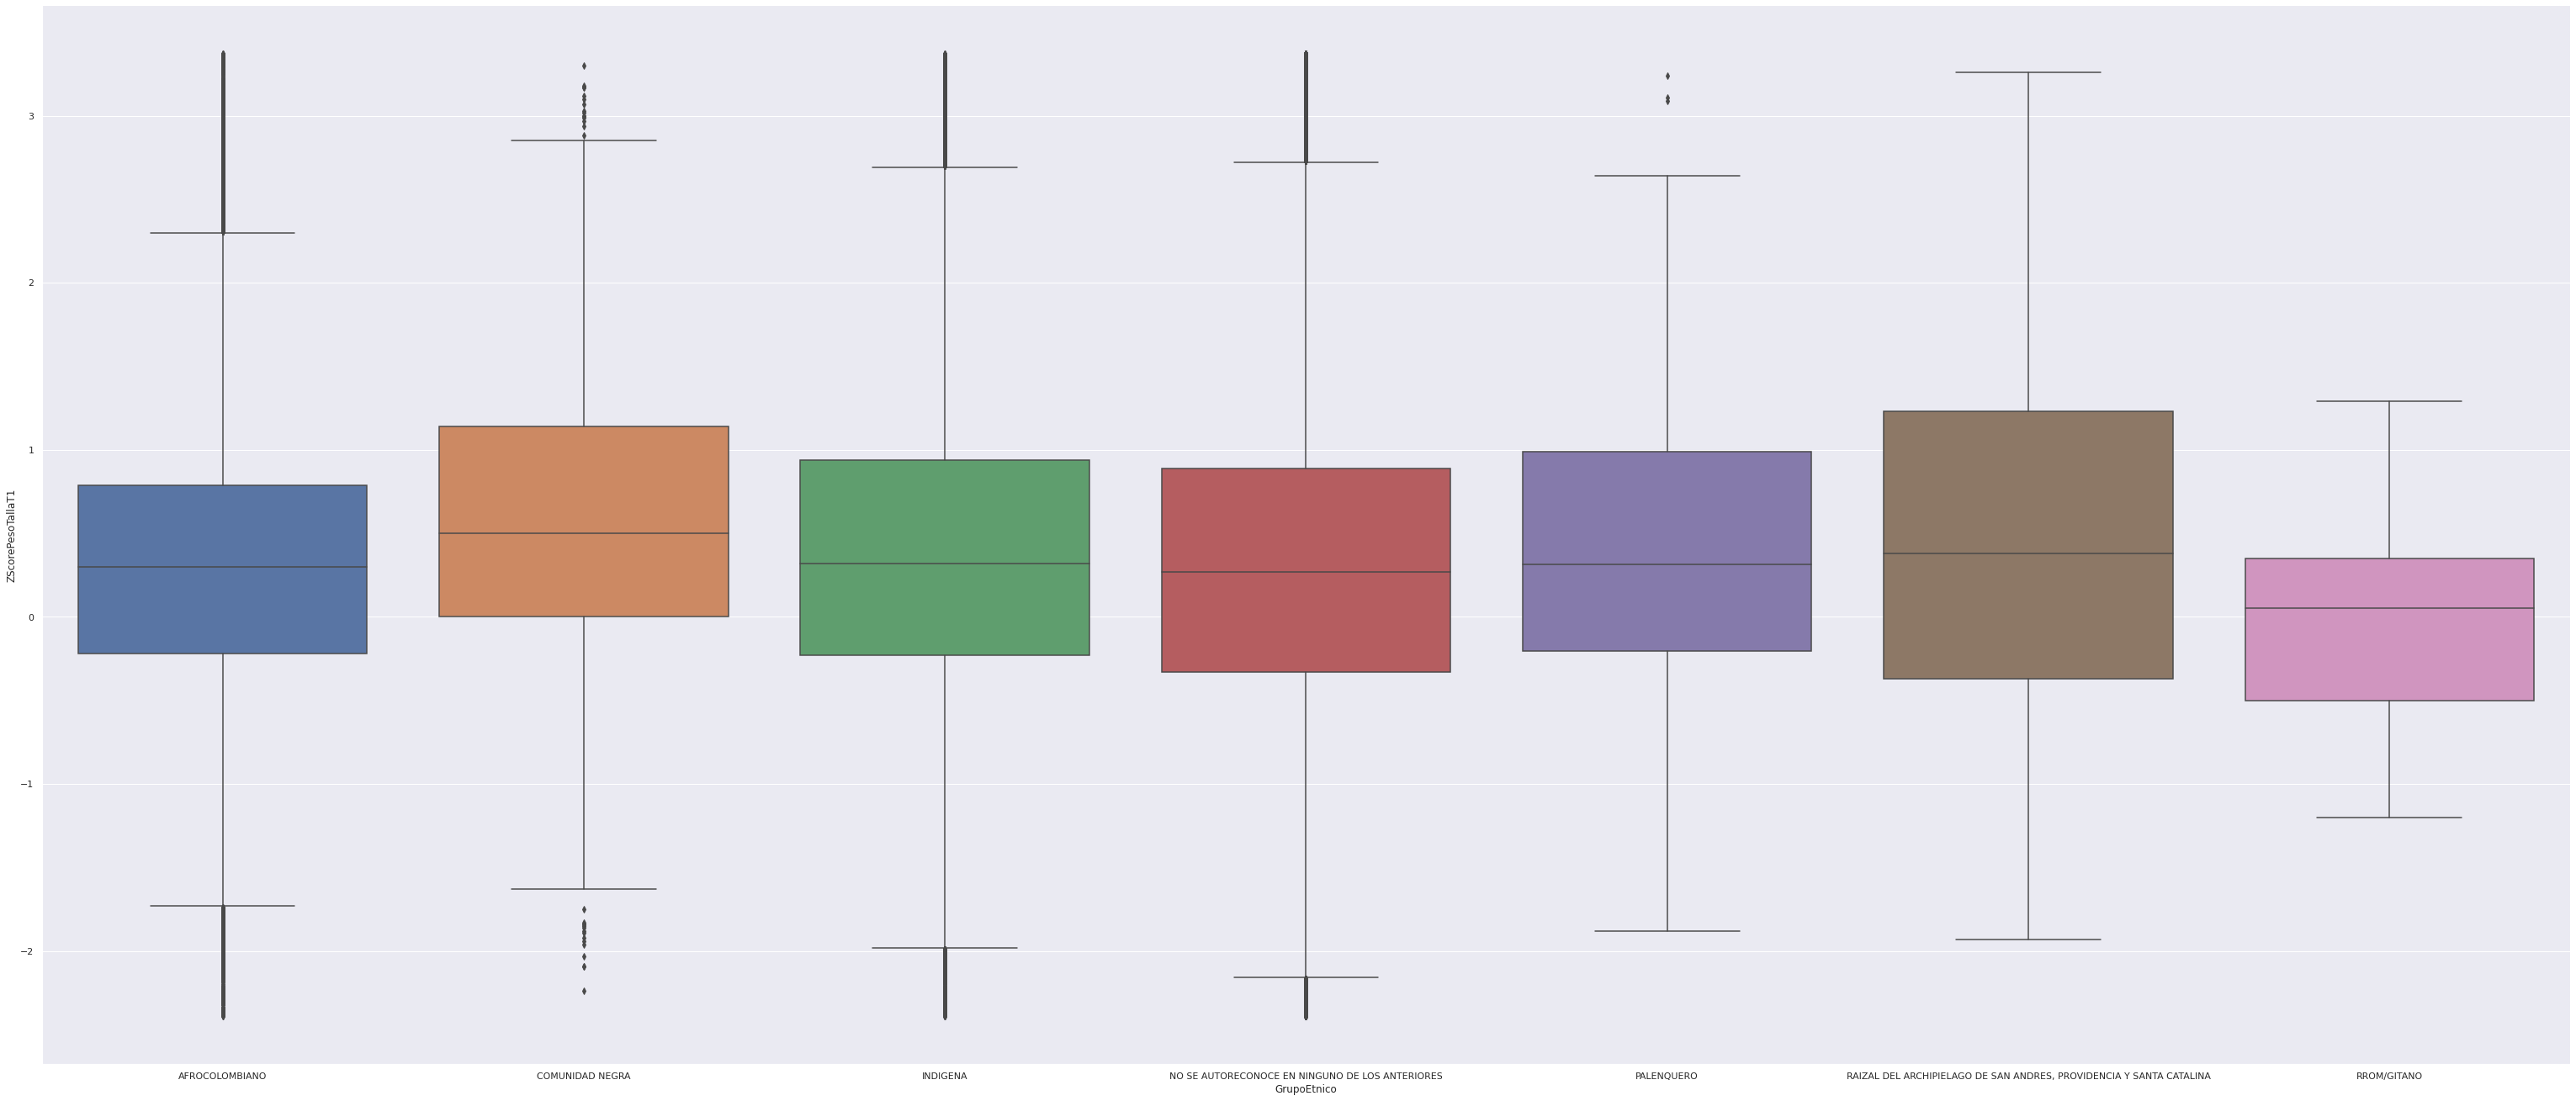

In [ ]:
g=sns.catplot(x="GrupoEtnico", y="ZScorePesoTallaT1",
            kind="box", data=tom_filter_zscore)
g.fig.set_size_inches(100,20)

In [ ]:
tom.head(5)

Vigencia  IdBeneficiario       Id TipoBeneficiario FechaNacimiento Sexo  \
0     2017        12230154  2267350              NaN      2013-05-21    M   
1     2017        12230155     <NA>              NaN      2012-12-28    M   
2     2017        12230170  4837594              NaN      2015-05-14    M   
3     2017        12230174     <NA>              NaN      2015-02-07    F   
4     2017        12230192  3298454              NaN      2013-06-19    M   

   CodigoPaisNacimientoBeneficiario PaisNacimientoBeneficiario  \
0                               169                   Colombia   
1                               169                   Colombia   
2                               169                   Colombia   
3                               169                   Colombia   
4                               169                   Colombia   

  PresentaDiscapacidad ZonaUbicacionBeneficiario  \
0                   NO                  CABECERA   
1                   NO                  CABECERA   
2                   NO                     RESTO   
3                   NO                     RESTO   
4                   NO                     RESTO   

                                       GrupoEtnico  \
0  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
1  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
2  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
3  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   
4  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES   

   MesesLactanciaMaternaExclusiva  MesesLactanciaMaternaTotal  \
0                               6                           6   
1                               6                           6   
2                               6                           0   
3                               7                           6   
4                               6                          18   

   PesoBeneficiarioAlNacer  TallaBeneficiarioAlNacer AntecendentePremadurez  \
0                      NaN                       NaN                    NaN   
1                      NaN                       NaN                          
2                      NaN                       NaN                    NaN   
3                      NaN                       NaN                    NaN   
4                      NaN                       NaN                    NaN   

   EdadGestacionalAlNacer                             RegimenSeguridadSocial  \
0                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    
1                       0  BENEFICIARIO O COTIZANTE DEL  REGIMEN CONTRIBU...   
2                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    
3                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    
4                    <NA>               BENEFICIARIO DEL REGIMEN SUBSIDIADO    

     Toma1                                         ServicioT1  \
0  20171.0                   HCB TRADICIONAL- COMUNITARIO (T)   
1  20171.0         CDI SIN ARRIENDO -  INSTITUCIONAL INTEGRAL   
2  20171.0  DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI...   
3  20171.0  DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI...   
4  20171.0          HCB  AGRUPADOS -INSTITUCIONAL TRADICIONAL   

  FechaValoracionNutricionalT1  EdadMesesT1 FechaMedicionPerimetroBraquialT1  \
0                   2017-02-27         45.0                              NaT   
1                   2017-02-02         49.0                              NaT   
2                   2017-02-25         21.0                              NaT   
3                   2017-02-14         24.0                              NaT   
4                   2017-02-08         43.0                              NaT   

   MedicionPerimetroBraquialT1  PesoT1  TallaT1  ZScoreTallaEdadT1  \
0                          NaN    20.1    101.0              -0.19   
1                          NaN    17.0    102.5              -0.35   
2                          NaN    11.0     78.0              -2.60   
3    

In [ ]:
tom['EstadoPesoTallaT1'].unique()

['Sobrepeso', 'Peso adecuado para la talla', 'Riesgo de sobrepeso', NaN, 'Riesgo de desnutrición aguda', 'Obesidad', 'Desnutrición aguda moderada', 'Desnutrición aguda severa']
Categories (7, object): ['Desnutrición aguda severa' < 'Desnutrición aguda moderada' <
                         'Riesgo de desnutrición aguda' < 'Peso adecuado para la talla' < 'Riesgo de sobrepeso' <
                         'Sobrepeso' < 'Obesidad']

**Malnutrition Risk Population**

In [ ]:
# Keeping only population with zscores < 1
riesgo_desnutricion = tom[tom['ZScorePesoTallaT1'] < -1]

In [ ]:
cols_to_plot = ['TipoBeneficiario', 'Sexo', 'PresentaDiscapacidad', 'ZonaUbicacionBeneficiario', 'GrupoEtnico', 'PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer',
                   'MedicionPerimetroBraquialT1', 'PesoT1', 'TallaT1', 'ZScorePesoTallaT1']
riesgo_desnutricion_cols = riesgo_desnutricion[cols_to_plot]

In [ ]:
riesgo_desnutricion_cols.head()

TipoBeneficiario Sexo PresentaDiscapacidad ZonaUbicacionBeneficiario  \
35              NaN    M                   NO                  CABECERA   
40              NaN    F                   NO                     RESTO   
49              NaN    F                   NO                     RESTO   
61              NaN    M                   NO                  CABECERA   
62              NaN    M                   NO                  CABECERA   

                                        GrupoEtnico  PesoBeneficiarioAlNacer  \
35  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES                      NaN   
40                                   AFROCOLOMBIANO                      NaN   
49                                         INDIGENA                      NaN   
61  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES                      NaN   
62  NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES                      NaN   

    TallaBeneficiarioAlNacer  MedicionPerimetroBraquialT1  PesoT1  TallaT1  \
35                       NaN                          NaN    11.0     87.0   
40                       NaN                          NaN     9.0     78.0   
49                       NaN                          NaN     9.5     83.0   
61                       NaN                          NaN    10.7     87.5   
62                       NaN                          NaN    11.2     89.0   

    ZScorePesoTallaT1  
35              -1.27  
40              -1.01  
49              -1.59  
61              -1.75  
62              -1.55

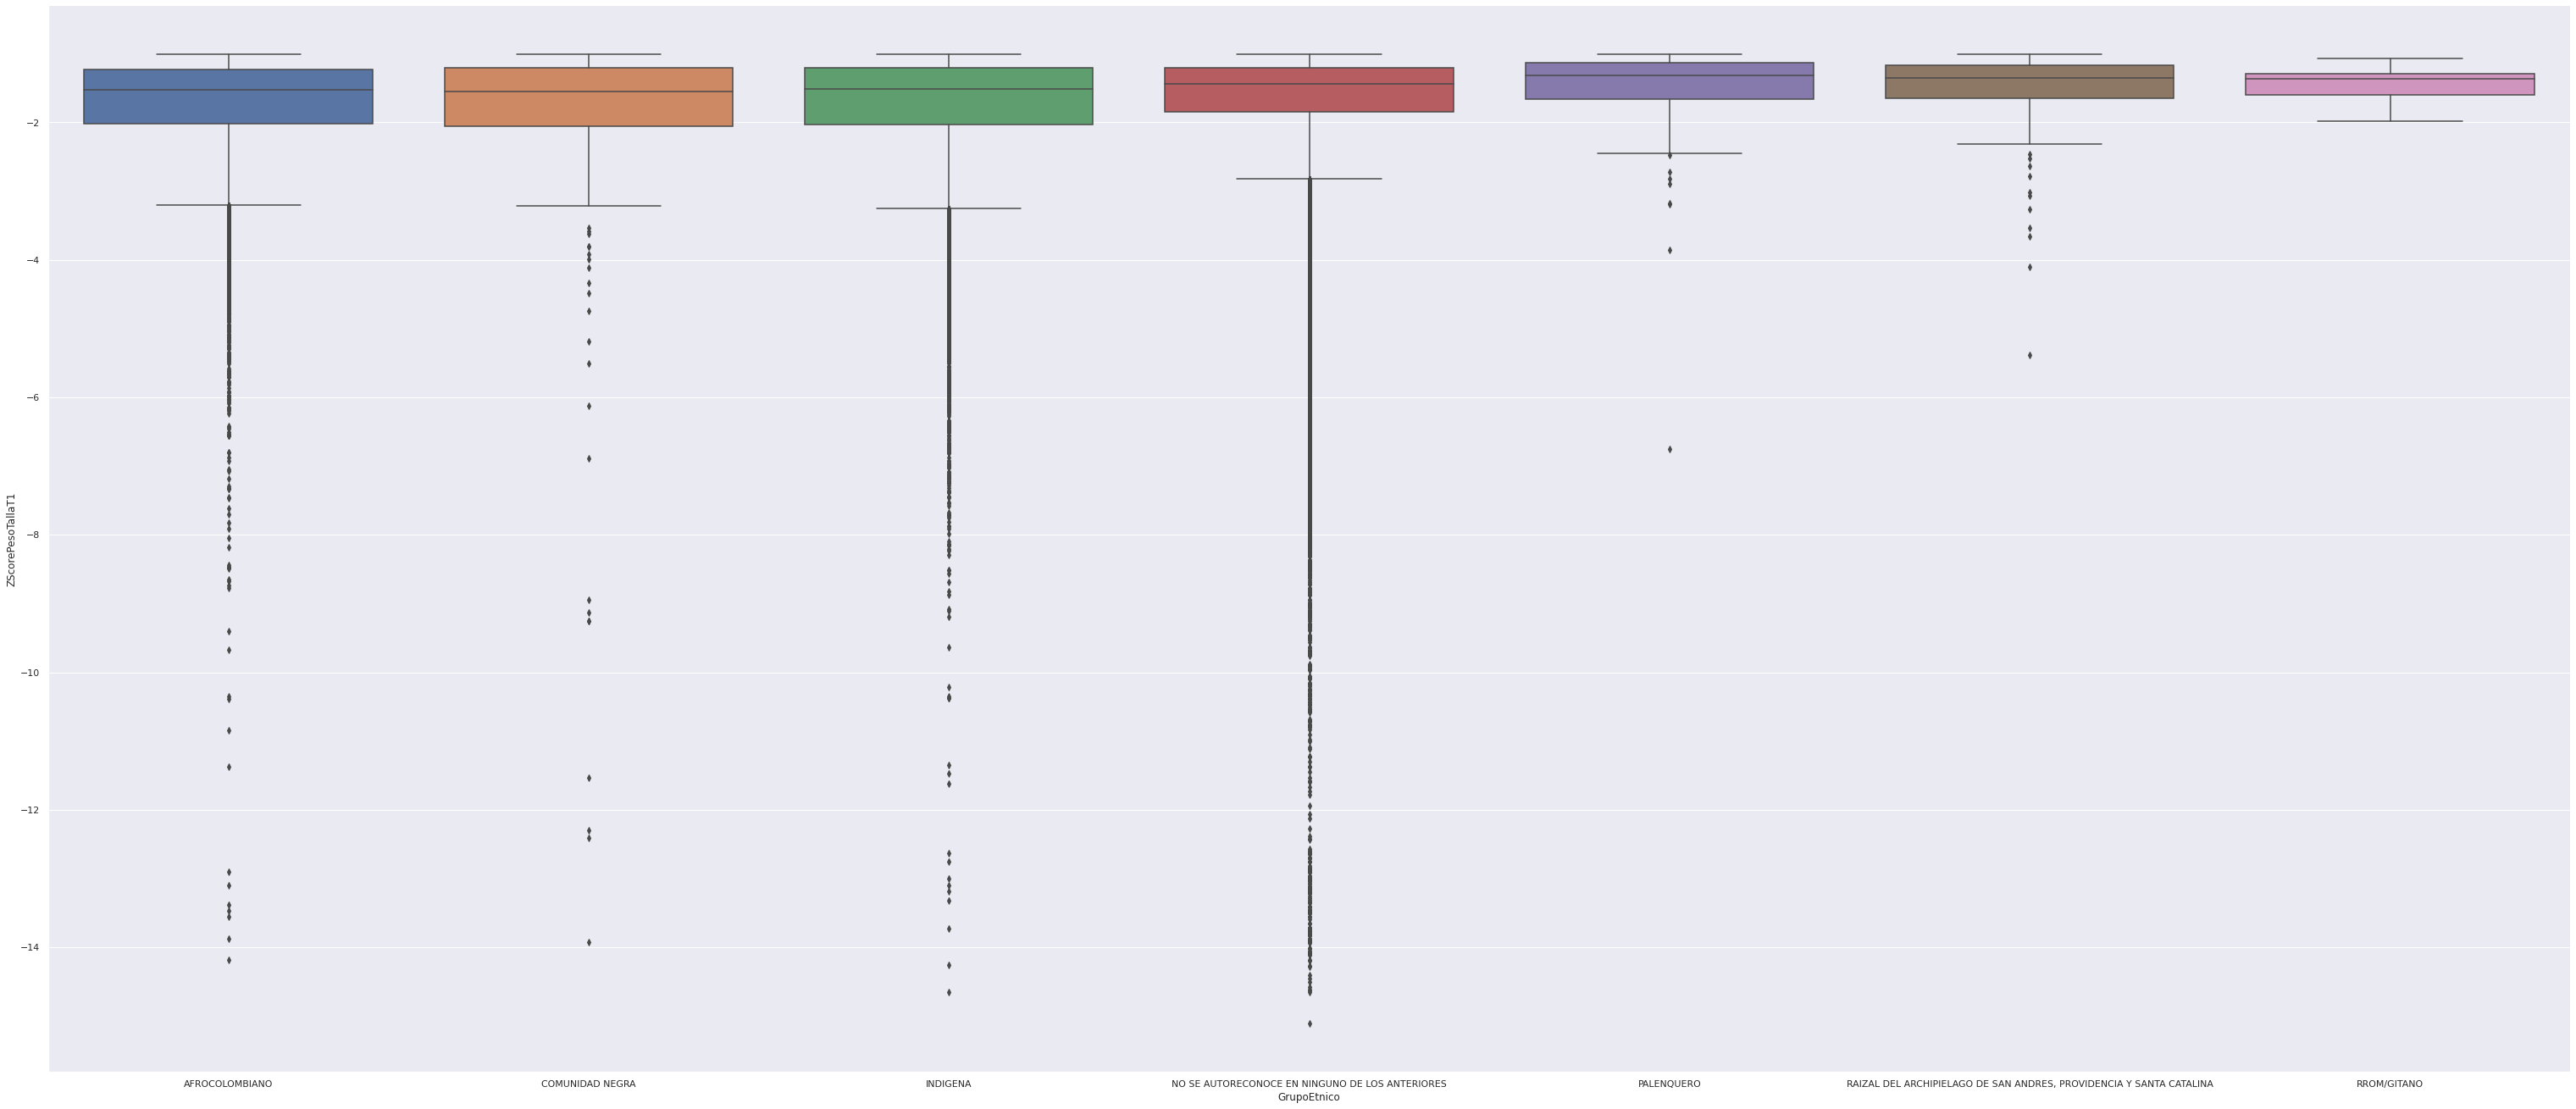

In [ ]:
g=sns.catplot(x="GrupoEtnico", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desnutricion_cols)
g.fig.set_size_inches(100,20)

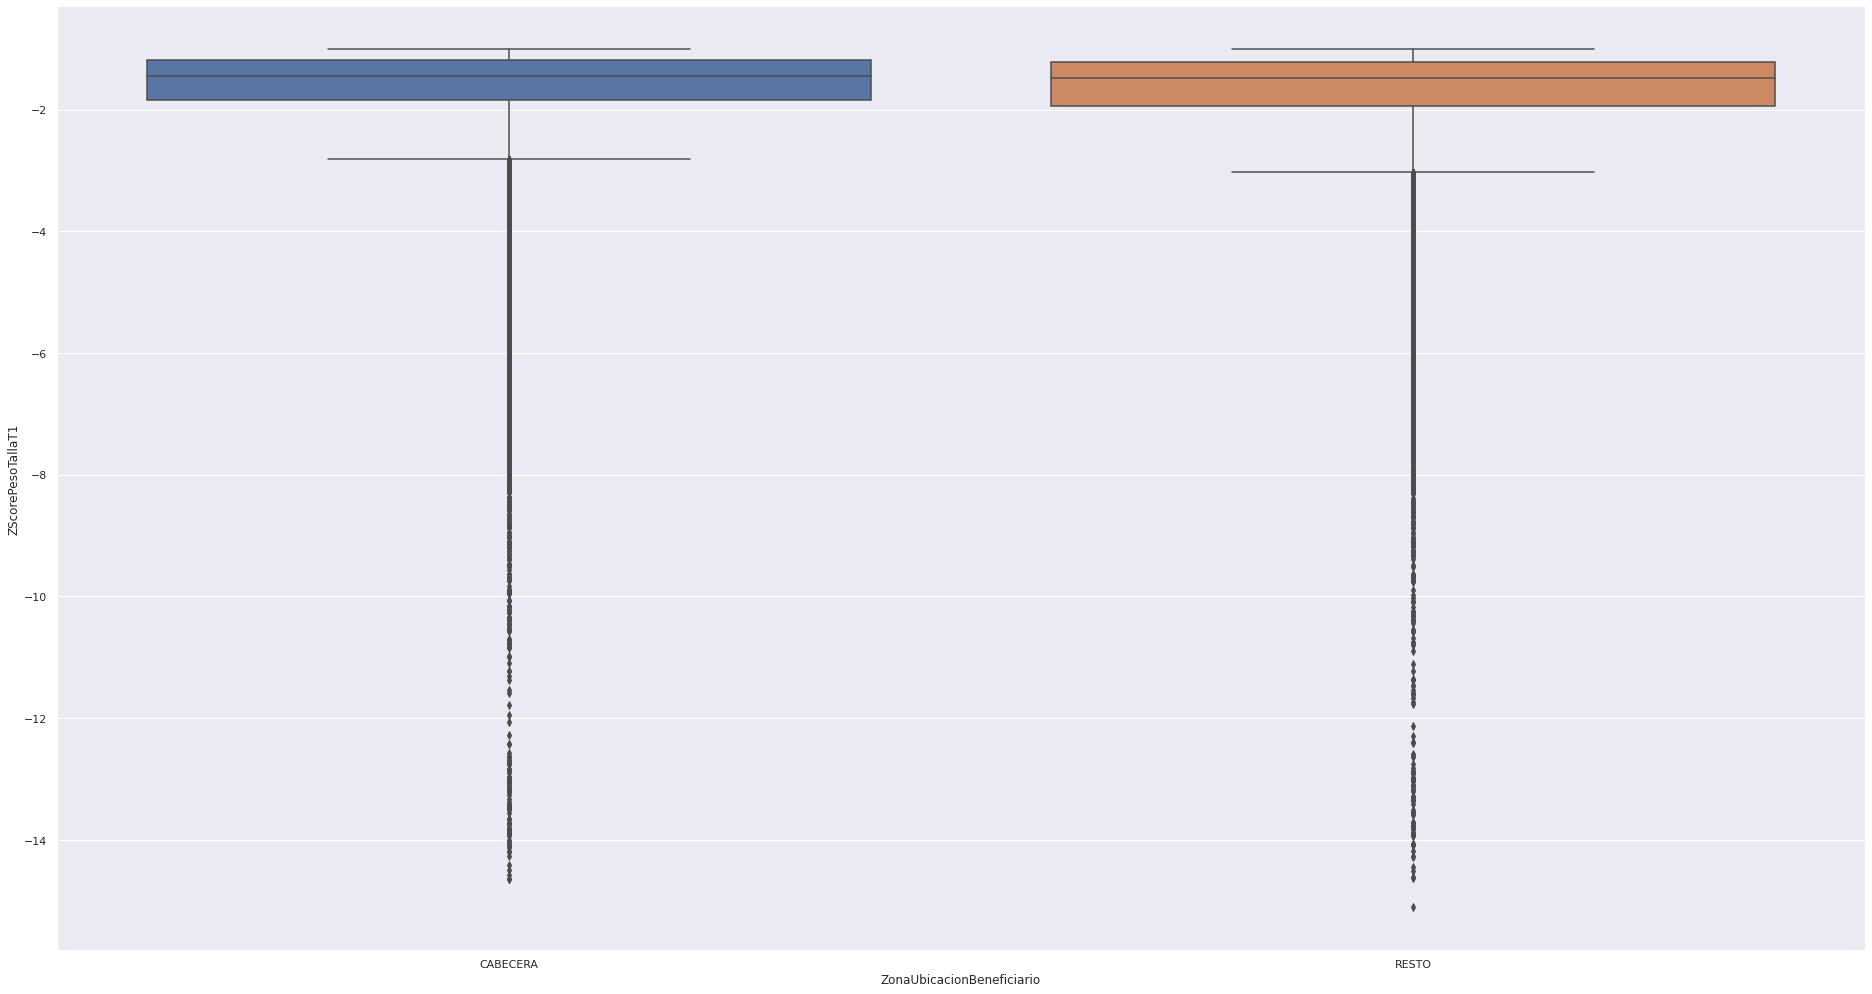

In [ ]:
g=sns.catplot(x="ZonaUbicacionBeneficiario", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desnutricion_cols)
g.fig.set_size_inches(30,15)

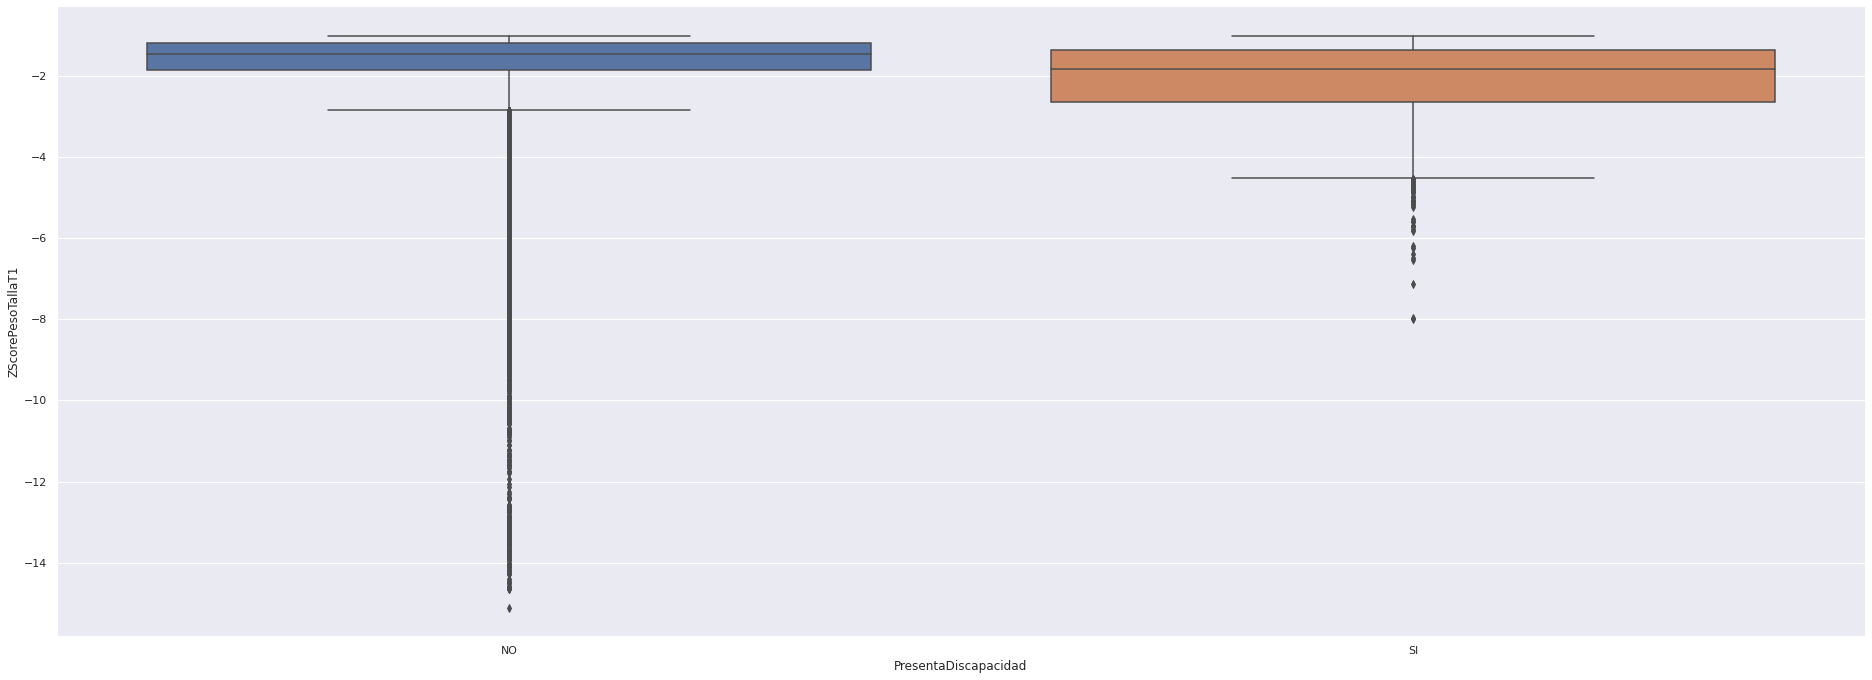

In [ ]:
g=sns.catplot(x="PresentaDiscapacidad", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desnutricion_cols)
g.fig.set_size_inches(30,10)

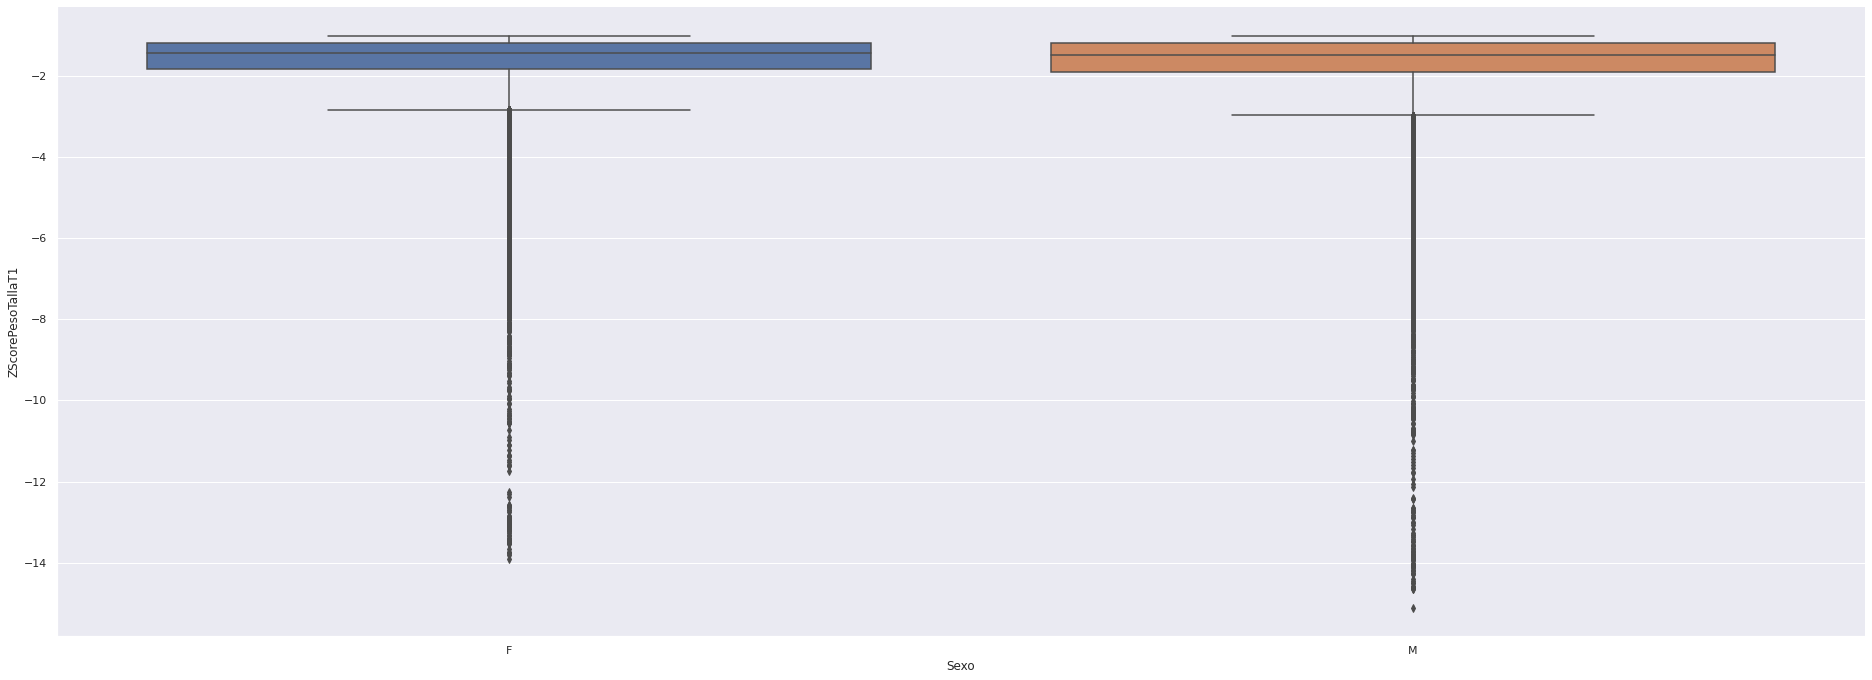

In [ ]:
g=sns.catplot(x="Sexo", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desnutricion_cols)
g.fig.set_size_inches(30,10)

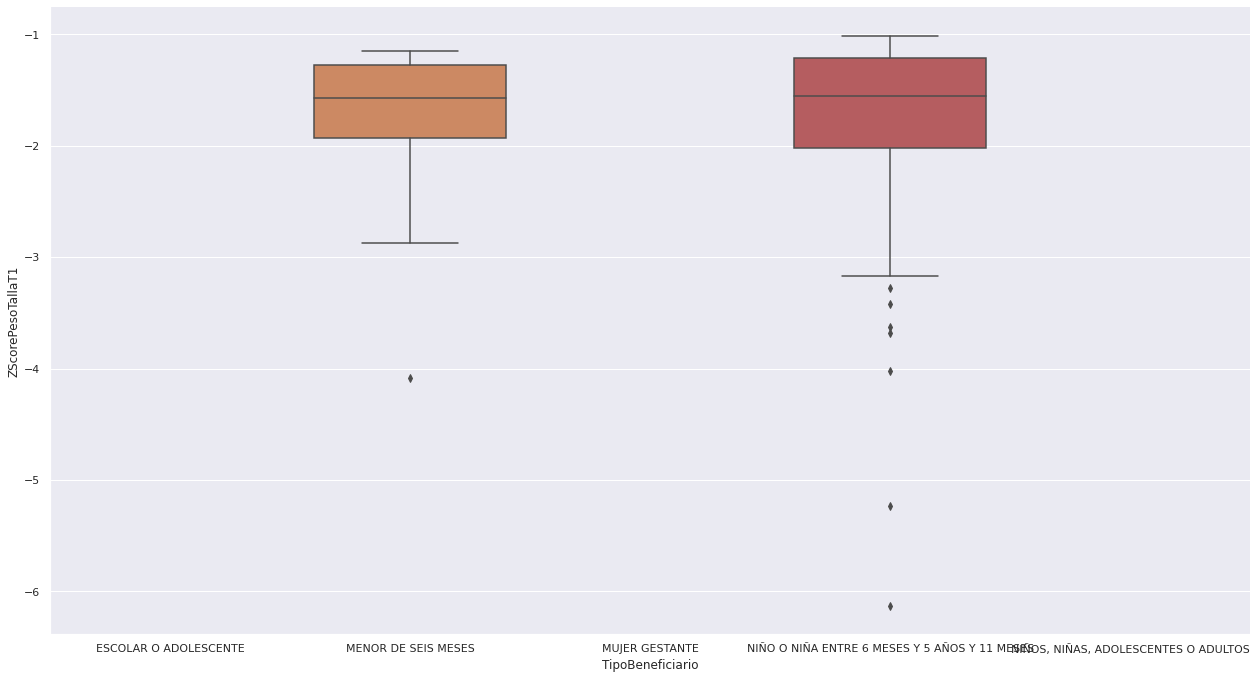

In [ ]:
g=sns.catplot(x="TipoBeneficiario", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desnutricion_cols)
g.fig.set_size_inches(30,10)

**Removing first 1% quantile to avoid extreme zscore values**

In [ ]:
q01=riesgo_desnutricion_cols['ZScorePesoTallaT1'].quantile(0.01)

In [ ]:
riesgo_desn_filtrado = riesgo_desnutricion_cols[riesgo_desnutricion_cols['ZScorePesoTallaT1']>q01]

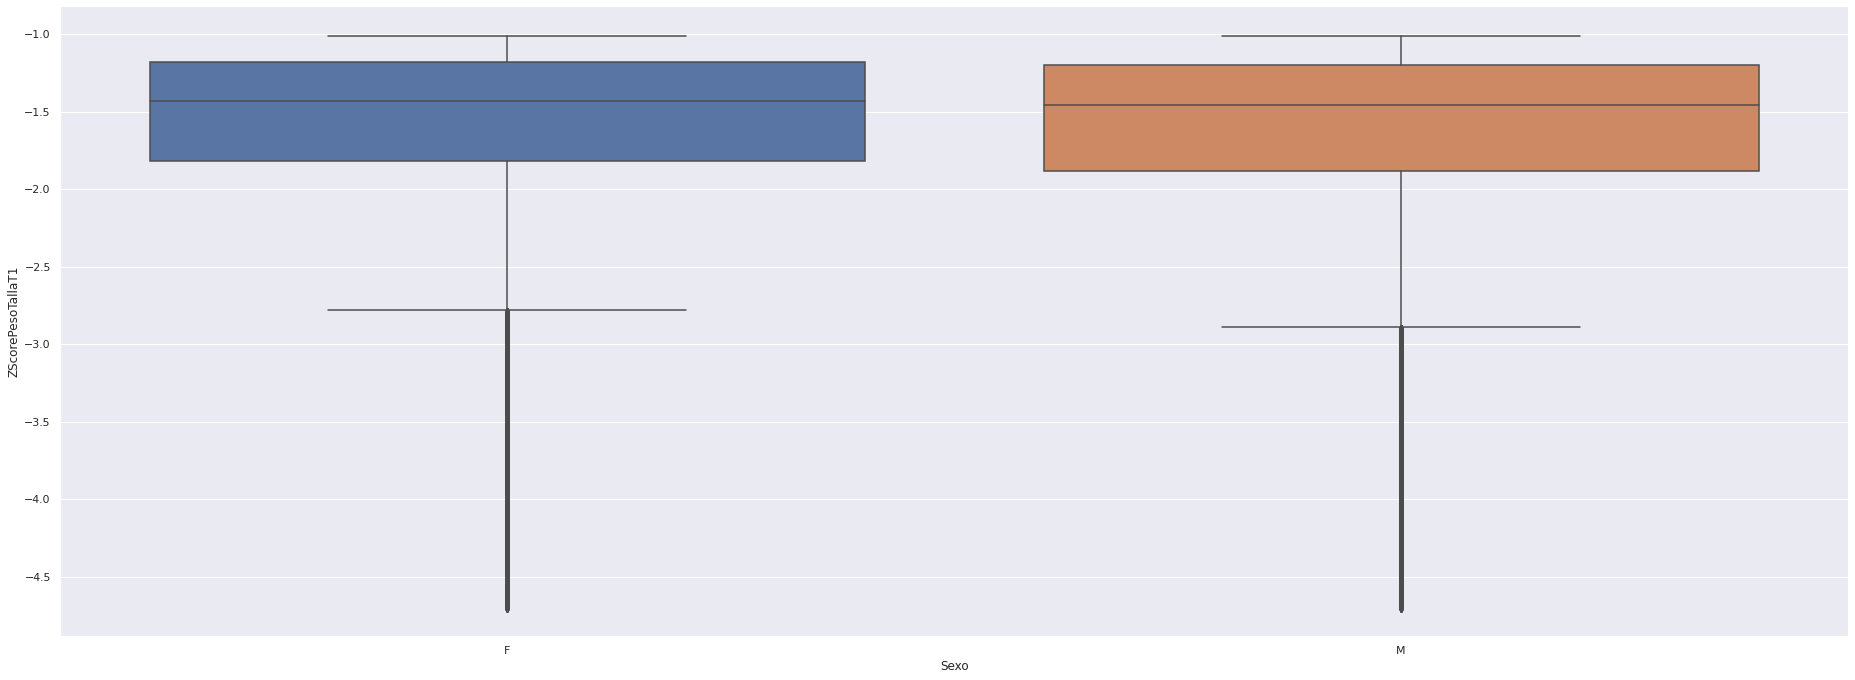

In [ ]:
g=sns.catplot(x="Sexo", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desn_filtrado)
g.fig.set_size_inches(30,10)

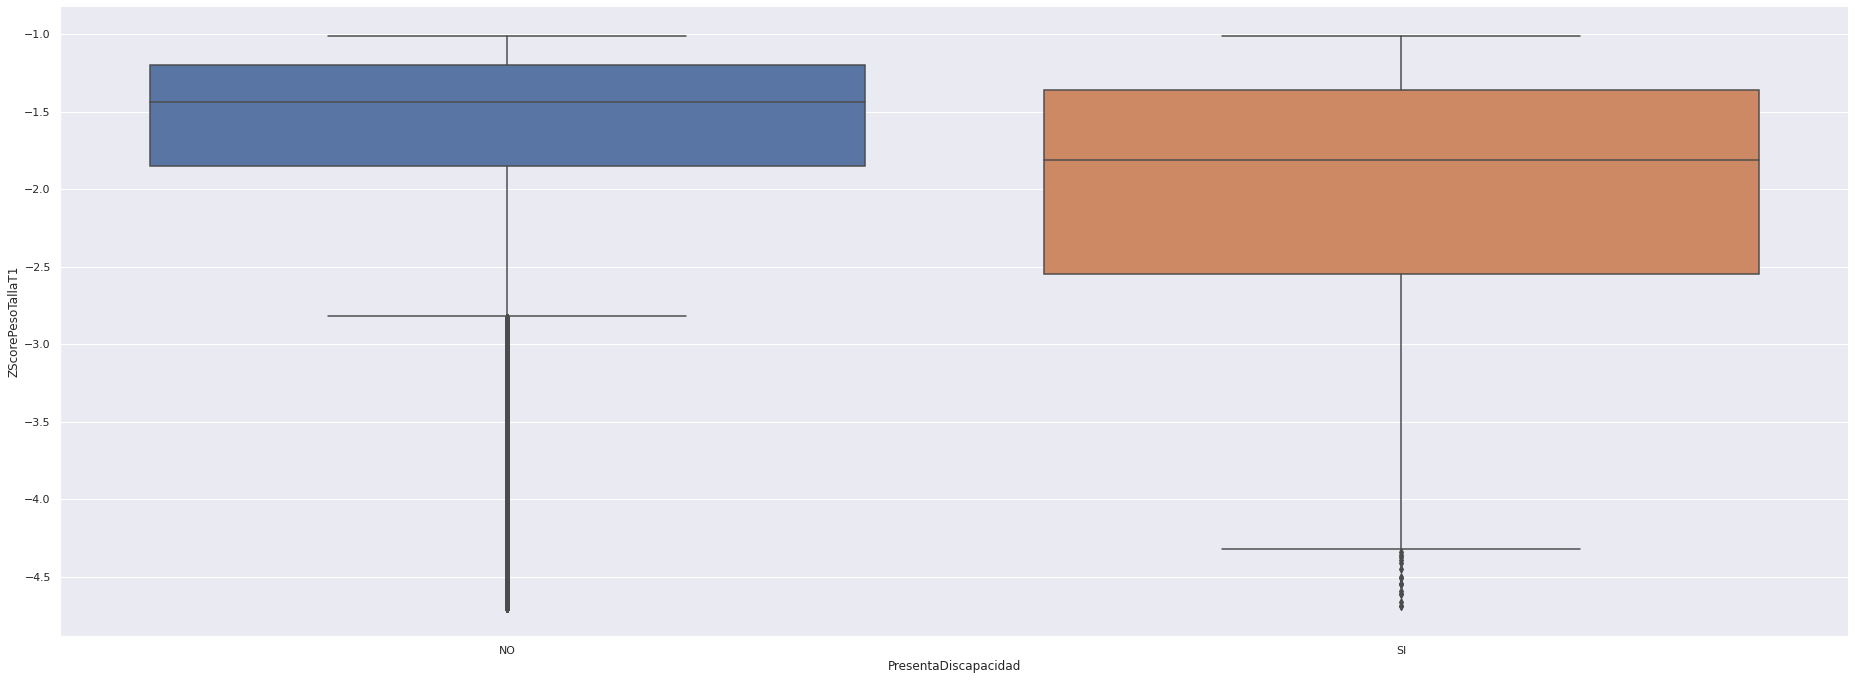

In [ ]:
g=sns.catplot(x="PresentaDiscapacidad", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desn_filtrado)
g.fig.set_size_inches(30,10)

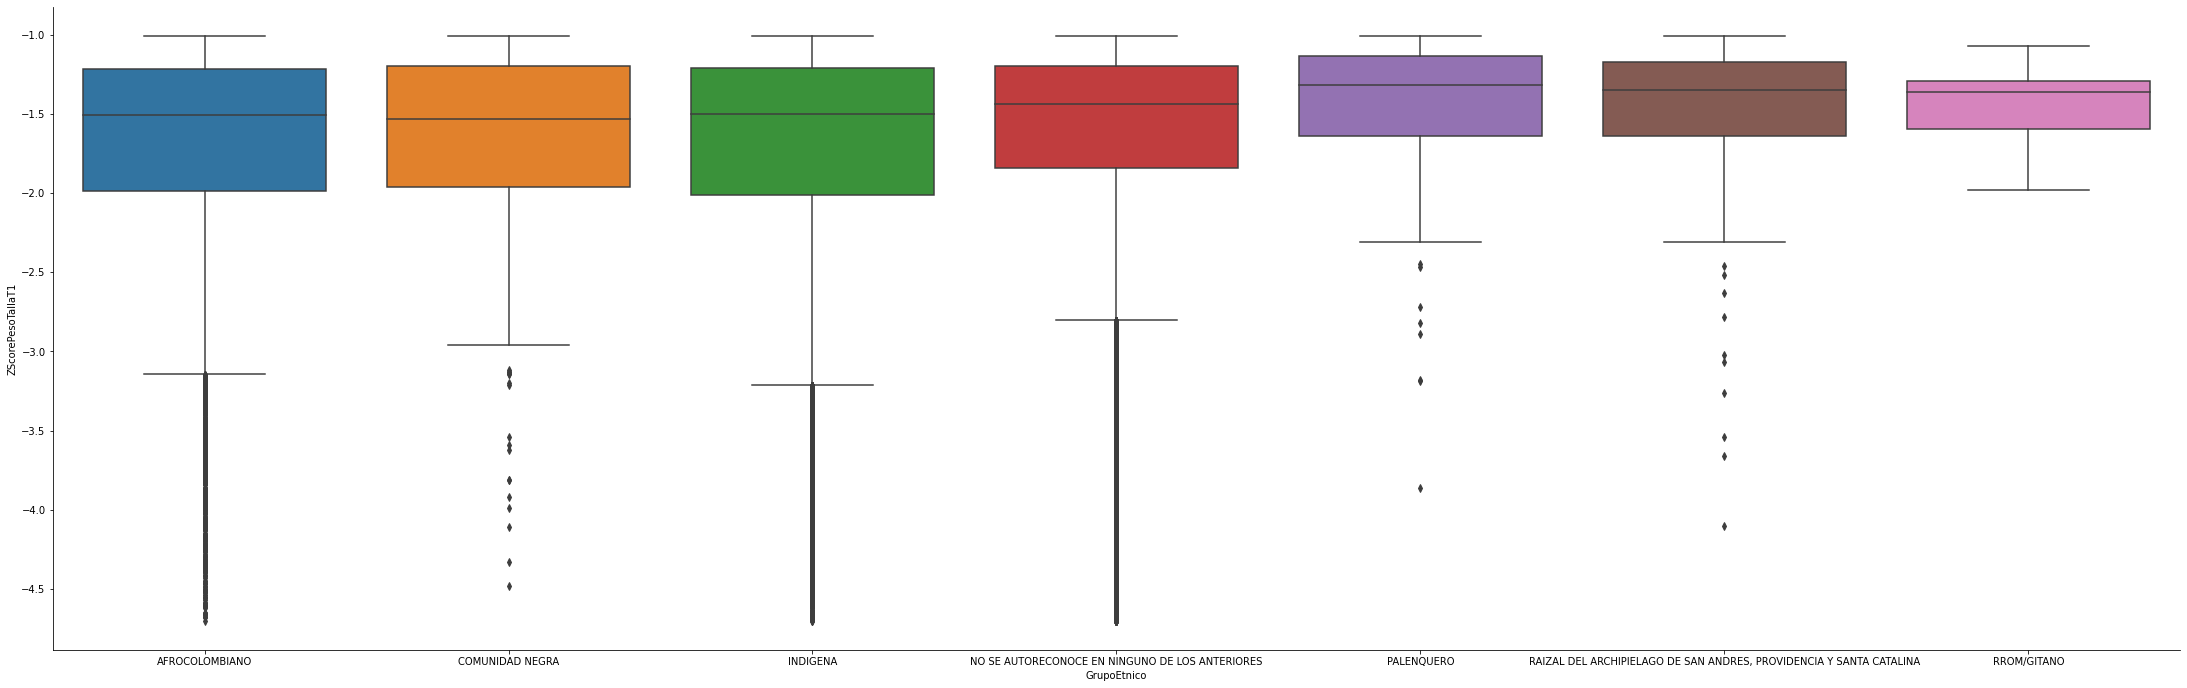

In [ ]:
g=sns.catplot(x="GrupoEtnico", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desn_filtrado)
g.fig.set_size_inches(60,10)

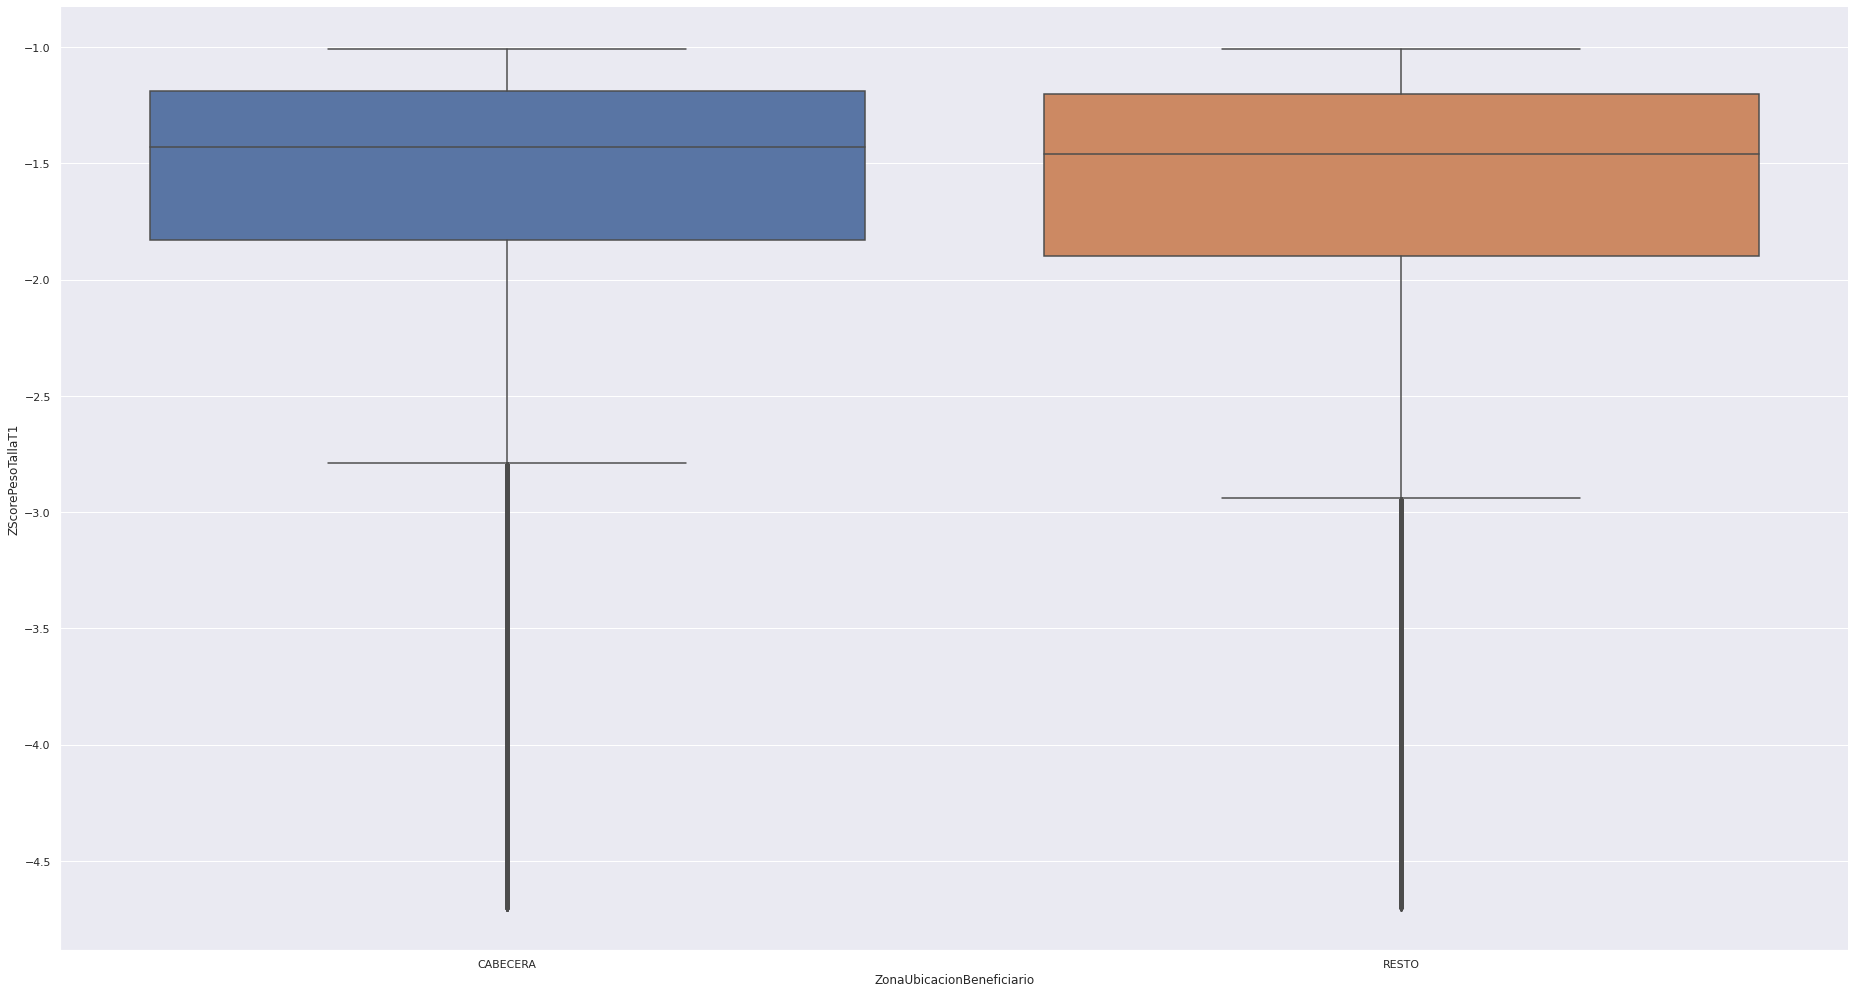

In [ ]:
g=sns.catplot(x="ZonaUbicacionBeneficiario", y="ZScorePesoTallaT1",
            kind="box", data=riesgo_desn_filtrado)
g.fig.set_size_inches(30,15)

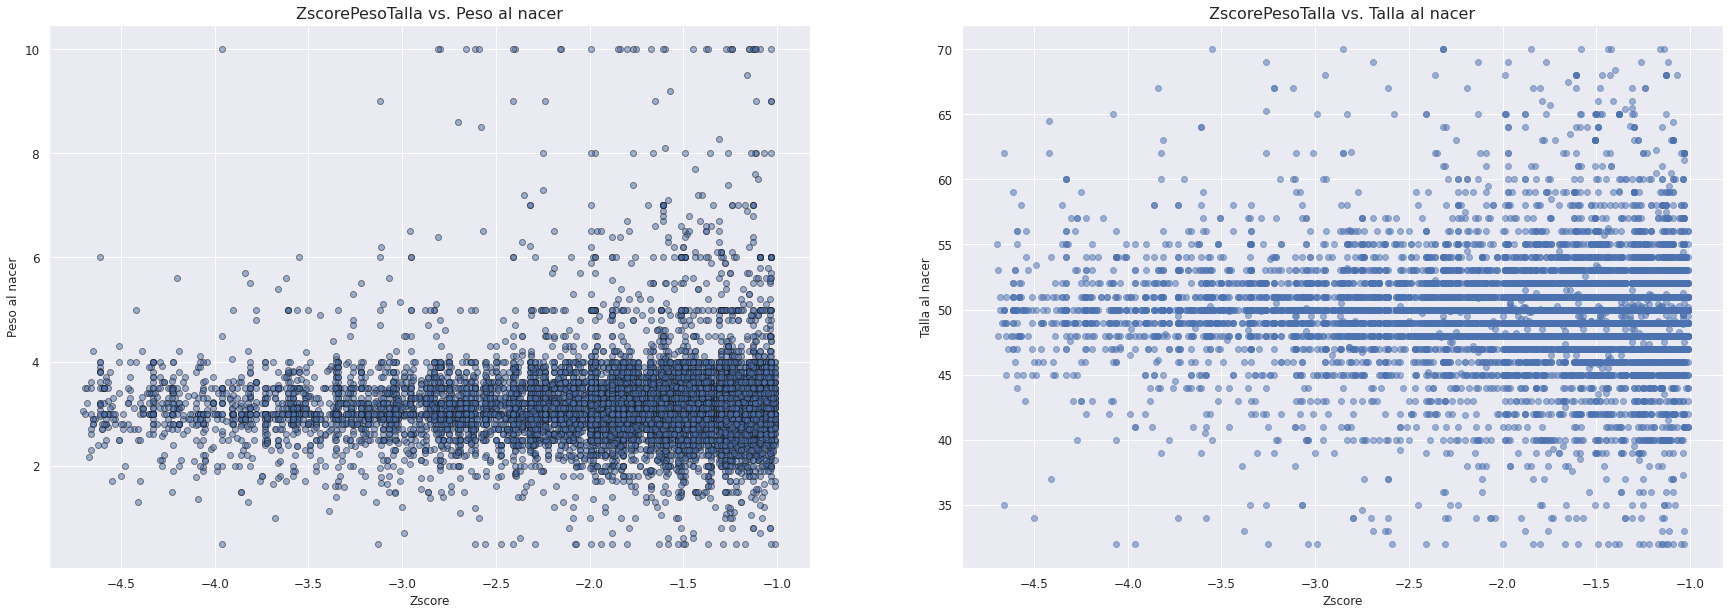

In [ ]:
# Zscore vs Peso al nacer
plt.figure(figsize=(30,10))

plt.subplot(121)

plt.scatter(x=riesgo_desn_filtrado['ZScorePesoTallaT1'], y=riesgo_desn_filtrado['PesoBeneficiarioAlNacer'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.yticks(fontsize=12)
plt.ylabel('Peso al nacer', fontsize=12)

plt.xticks(fontsize=12)
# plt.xlim(0, 120000)
plt.xlabel('Zscore', fontsize=12)

plt.title('ZscorePesoTalla vs. Peso al nacer', fontsize=16)

# Zscore vs Talla al nacer
plt.subplot(122)

plt.scatter(x=riesgo_desn_filtrado['ZScorePesoTallaT1'], y=riesgo_desn_filtrado['TallaBeneficiarioAlNacer'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.xlabel('Zscore', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 120000)
plt.ylabel('Talla al nacer', fontsize=12)
plt.yticks(fontsize=12)

plt.title('ZscorePesoTalla vs. Talla al nacer', fontsize=16)

plt.show()

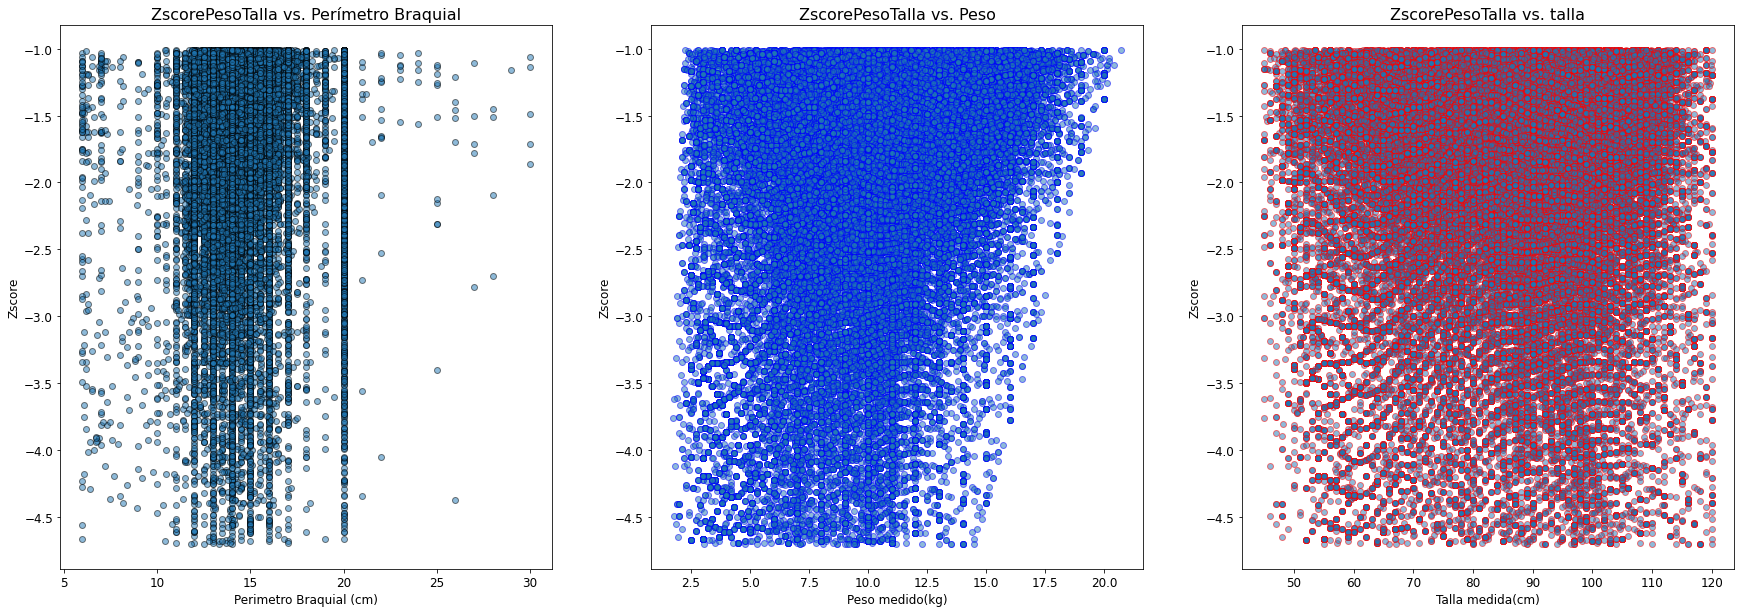

In [ ]:
# Zscore vs Perimetro Braquial
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.scatter(y=riesgo_desn_filtrado['ZScorePesoTallaT1'], x=riesgo_desn_filtrado['MedicionPerimetroBraquialT1'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.xticks(fontsize=12)
plt.xlabel('Perimetro Braquial (cm)', fontsize=12)

plt.yticks(fontsize=12)
# plt.xlim(0, 120000)
plt.ylabel('Zscore', fontsize=12)

plt.title('ZscorePesoTalla vs. Perímetro Braquial', fontsize=16)

# Zscore vs Medición de peso
plt.subplot(132)

plt.scatter(y=riesgo_desn_filtrado['ZScorePesoTallaT1'], x=riesgo_desn_filtrado['PesoT1'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Peso medido(kg)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('ZscorePesoTalla vs. Peso', fontsize=16)

# Zscore vs Talla medida
plt.subplot(133)

plt.scatter(y=riesgo_desn_filtrado['ZScorePesoTallaT1'], x=riesgo_desn_filtrado['TallaT1'], edgecolor='r', alpha=0.5)

#plt.xlim(0, 100)
plt.ylabel('Zscore', fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0, 120000)
plt.xlabel('Talla medida(cm)', fontsize=12)
plt.xticks(fontsize=12)

plt.title('ZscorePesoTalla vs. talla', fontsize=16)

plt.show()